In [7]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import qmc 
import functionBank as func
import os
import optimiserBank as opt
import imageio
from PIL import Image
import scienceplots
plt.style.available
plt.style.use(['science', 'notebook'])
from sklearn.preprocessing import MinMaxScaler
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.indicators.igd import IGD
from pymoo.util.plotting import plot
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
from itertools import product
import functionBank




In [8]:
def generate_nd_grid(dimensions, n_points, range_min=0, range_max=1):
    """
    Generate an equally spaced array in an n-dimensional space.

    Parameters:
        dimensions (int): Number of dimensions.
        n_points (int): Number of points per dimension.
        range_min (float): Minimum value for each dimension.
        range_max (float): Maximum value for each dimension.

    Returns:
        np.ndarray: A 2D array where each row represents an n-dimensional point.
    """
    # Create 1D linspace for each dimension
    linspace = np.linspace(range_min, range_max, n_points)
    
    # Generate the n-dimensional grid
    grid = np.meshgrid(*[linspace] * dimensions, indexing='ij')
    
    # Combine into a single array of points
    nd_array = np.stack(grid, axis=-1).reshape(-1, dimensions)
    
    return nd_array

In [13]:
#functions and their PLOTTING BOUNDS
# functionDict = {func.binhAndKorn:[(-10,150), (-5,55)], 
#                 func.chankongHaimes:[(-10,260), (-260,10)], 
#                 func.fonsecaFleming:[(-0.1,1.25), (-0.1,1.25)], 
#                 func.ctp1:[(0,1), (0.5,1.1)], 
#                 func.constrEx:[(0.3,1), (1,9)], 
#                 func.testFunction4:[(-4,12), (-7,-5)]}

# for key, value in functionDict.items():

#     print(key.__name__, value)
#     # print(value.shape)
#     bounds = np.array(value)
#     print(bounds[0,0], bounds[0,1], bounds[1,0], bounds[1,1])

# dtlzProblems = ['dtlz1','dtlz2','dtlz3','dtlz4','dtlz5','dtlz6','dtlz7',]
dtlzProblems = ['dtlz1','dtlz2', 'dtlz5', 'dtlz7']

n_var = 7
n_obj = 3

files = glob.glob(f'/Users/benmoore/projects/elgarMOOOpt/dtlz1257{n_obj}ObjRunI/*')

hyperVDict = {}

LSADEDict = {}
TSDDEODict = {}
ESADict = {}
BOMMDict = {}
BODict = {}

for func in dtlzProblems:
    LSADEDict[func] = {}
    TSDDEODict[func] = {}
    ESADict[func] = {}
    BOMMDict[func] = {}
    BODict[func] = {}


    problem = get_problem(func, n_var, n_obj)

    needed_substring = func
    plottingBounds = np.array([(0,5), (0,5)])
    print(plottingBounds.shape)

    # xMargin = abs(plottingBounds[0,0] - plottingBounds[0,1])/10
    # yMargin = abs(plottingBounds[1,0] - plottingBounds[1,1])/10
    # print(xMargin, yMargin)

    # Create a dictionary to hold the arrays
    data_arrays = {}
    # hyperVDict[f'{needed_substring}'] = {}
    # Define a lambda function to clean the file names
    clean_name = lambda name: name.replace(f'ObjtvTargets{needed_substring}', '')

    # needed_substring = "binhAndKorn"


    for file in files:
        # Skip files that contain the ignore substring
        if f'ObjtvTargets{needed_substring}' not in file:
            continue  # Skip to the next file

        # Extract the base name (without extension)
        base_name = os.path.splitext(os.path.basename(file))[0]
        # Clean the base name
        clean_base_name = clean_name(base_name)
        # Load the file into a NumPy array and store it in the dictionary
        data_arrays[clean_base_name] = np.loadtxt(file)

    #load in pareto front for current function:
    # paretoFront = np.loadtxt(f'paretoFronts/{needed_substring}Pareto.txt')
    ref_dirs = get_reference_directions("das-dennis", n_obj, n_partitions=10)

    if func == 'dtlz5' or func == 'dtlz6' or func == 'dtlz7':
        problem, bounds = functionBank.getPyMooProblem(func, n_var, n_obj)

        # Define the range and number of points per dimension
        n_points = 4  # Number of points per dimension
        range_min, range_max = 0, 1  # Range for each dimension

        ndGrid = generate_nd_grid(n_var, n_points, range_min, range_max)

        functionOutput = np.zeros((0,n_obj))
        for i in range(0, len(ndGrid)):
            functionOutput = np.vstack((functionOutput, opt.MOobjective_function(ndGrid[i], problem, n_obj)))

        paretoFront = functionBank.computeParetoShells(functionOutput)[0]
    else:

        paretoFront = get_problem(func).pareto_front(ref_dirs)
    
    ind = IGD(paretoFront)


    # scalarisingFunction = ['weightedSum', 'EWC', 'weightedPower', 'weightedNorm', 'chebyshev', 'augmentedChebychev', 
    #                 'modifiedChebychev', 'PBI', 'PAPBI', 'HypI', 'APD']
    scalarisingFunction = ['weightedNorm', 'chebyshev',
                    'modifiedChebychev', 'PBI', 'PAPBI', 'HypI', 'APD']

    print(func)
    for scalarisingName in scalarisingFunction:

        print(scalarisingName)

        if scalarisingName == 'weightedSum':
            dictName = 'WS'
        if scalarisingName == 'EWC':
            dictName = 'EWC'
        if scalarisingName == 'weightedPower':
            dictName = 'WPO'
        if scalarisingName == 'weightedNorm':
            dictName = 'WN'
        if scalarisingName == 'chebyshev':
            dictName = 'TCH'
        if scalarisingName == 'augmentedChebychev':
            dictName = 'ATCH'
        if scalarisingName == 'modifiedChebychev':
            dictName = 'MTCH'
        if scalarisingName == 'PAPBI':
            # print('here')
            dictName = 'PAPBI'
        if scalarisingName == 'PBI':
            # print('here')
            dictName = 'PBI'
        if scalarisingName == 'HypI':
            dictName = 'HypI'


        print(dictName)

        
        for name, array in data_arrays.items():
            # print(array.shape, paretoFront.shape)

            if scalarisingName not in name:
                continue

            if scalarisingName == 'PBI':
                if 'PAPBI' in name:
                    continue

            print(name)
            if 'BO' in name:

                if 'MinMax' in name:
                    igdValue = ind(array)
                    BOMMDict[func][dictName] = igdValue
                    print('BOMM IGD =', ind(array))
                else:
                    igdValue = ind(array)
                    BODict[func][dictName] = igdValue
                    print('BO IGD =', ind(array))



            if 'LSADE' in name:
                igdValue = ind(array)
                LSADEDict[func][dictName] = igdValue

                print('LSADE IGD =', ind(array))


            if 'TSDDEO' in name:
                igdValue = ind(array)
                TSDDEODict[func][dictName] = igdValue

                print('TSDDEO IGD =', ind(array))

            if 'ESA' in name:
                igdValue = ind(array)
                ESADict[func][dictName] = igdValue

                print('ESA IGD =', ind(array))






(2, 2)
dtlz1
weightedNorm
WN
LSADEweightedNorm
LSADE IGD = 50.33537328560436
TSDDEOweightedNorm
TSDDEO IGD = 60.31715050126253
BOweightedNorm
BO IGD = 38.17416580644265
ESAweightedNorm
ESA IGD = 30.077966851697326
chebyshev
TCH
ESAchebyshev
ESA IGD = 10.642720584723094
TSDDEOchebyshev
TSDDEO IGD = 35.23974903611504
BOchebyshev
BO IGD = 30.885531060155326
LSADEchebyshev
LSADE IGD = 37.934140161409836
modifiedChebychev
MTCH
BOmodifiedChebychev
BO IGD = 26.095986741356246
TSDDEOmodifiedChebychev
TSDDEO IGD = 32.60832352355537
ESAmodifiedChebychev
ESA IGD = 37.56021575363556
LSADEmodifiedChebychev
LSADE IGD = 48.93889605872352
PBI
PBI
TSDDEOPBI
TSDDEO IGD = 25.572773088976597
BOPBI
BO IGD = 31.230584158276226
LSADEPBI
LSADE IGD = 34.501692345688525
ESAPBI
ESA IGD = 14.90794410222331
PAPBI
PAPBI
LSADEPAPBI
LSADE IGD = 34.501692345688525
ESAPAPBI
ESA IGD = 14.90794410222331
BOPAPBI
BO IGD = 31.230584158276226
TSDDEOPAPBI
TSDDEO IGD = 25.572773088976597
HypI
HypI
TSDDEOHypI
TSDDEO IGD = 38.77

In [10]:
dtlz1 = {}
dtlz2 = {}
dtlz3 = {}
dtlz1['2obj'] = {'WS':[42.26, 8.13], 
                 'EWC':[46.28, 16.52], 'WPO':[37.95, 20.37],
                 'WN':[41.54, 7.98],
                 'WPR':[38.38, 9.24],
                 'TCH':[41.15, 7.59],
                 'ATCH':[38.86, 5.55],
                 'MTCH':[38.98,7.00],
                 'PBI':[36.95, 6.20],
                 'HypI':[70.82,24.42],
                 'QPBI':[38.19, 11.76],
                 'APD':[36.44, 4.26]
                 }

dtlz1['3obj'] = {'WS':[41.55, 5.51], 
                 'EWC':[41.03, 14.44], 'WPO':[33.07, 7.59],
                 'WN':[42.60, 5.81],
                 'WPR':[34.86, 5.83],
                 'TCH':[39.33, 3.66],
                 'ATCH':[39.81, 2.91],
                 'MTCH':[40.32, 2.86],
                 'PBI':[34.63, 6.66],
                 'HypI':[60.13, 21.74],
                 'QPBI':[30.92, 11.70],
                 'APD':[34.58, 8.18]
                 }

dtlz1['5obj'] = {'WS':[38.40, 5.30], 
                 'EWC':[34.56, 11.79], 'WPO':[29.82, 8.37],
                 'WN':[38.85, 5.24],
                 'WPR':[37.24, 10.61],
                 'TCH':[36.92, 5.07],
                 'ATCH':[38.88, 5.72],
                 'MTCH':[38.23, 3.84],
                 'PBI':[13.42, 8.23],
                 'HypI':[48.57, 16.87],
                 'QPBI':[26.69, 5.78],
                 'APD':[28.94, 10.56]
                 }

dtlz2['2obj'] = {'WS':[0.19, 0.03], 
                 'EWC':[0.14, 0.03], 'WPO':[0.05, 0.01],
                 'WN':[0.19, 0.03],
                 'WPR':[0.19, 0.03],
                 'TCH':[0.04, 0],
                 'ATCH':[0.04, 0],
                 'MTCH':[0.04, 0],
                 'PBI':[0.11, 0.01],
                 'HypI':[0.08, 0.02],
                 'QPBI':[0.09, 0.02],
                 'APD':[0.04, 0.01]
                 }

dtlz2['3obj'] = {'WS':[0.26, 0.02], 
                 'EWC':[0.21, 0.03], 'WPO':[0.14, 0.01],
                 'WN':[0.27, 0.02],
                 'WPR':[0.25, 0.01],
                 'TCH':[0.16, 0.01],
                 'ATCH':[0.16, 0.01],
                 'MTCH':[0.17, 0.02],
                 'PBI':[0.15, 0.01],
                 'HypI':[0.11, 0.01],
                 'QPBI':[0.15, 0.01],
                 'APD':[0.14, 0.01]
                 }

dtlz2['5obj'] = {'WS':[0.41, 0.02], 
                 'EWC':[0.39, 0.04], 'WPO':[0.32, 0.01],
                 'WN':[0.40, 0.02],
                 'WPR':[0.37, 0.02],
                 'TCH':[0.40, 0.01],
                 'ATCH':[0.40, 0.02],
                 'MTCH':[0.40, 0.01],
                 'PBI':[0.25, 0.01],
                 'HypI':[0.28, 0.02],
                 'QPBI':[0.23, 0],
                 'APD':[0.23, 0]
                 }

dtlz3['2obj'] = {'WS':[93.74, 10.84], 
                 'EWC':[123.41, 43.55], 'WPO':[94.69, 20.13],
                 'WN':[88.45, 12.71],
                 'WPR':[87.19, 8.14],
                 'TCH':[88.54, 14.42],
                 'ATCH':[89.96, 12.05],
                 'MTCH':[92.26, 12.10],
                 'PBI':[93.65, 14.09],
                 'HypI':[177.05, 64.60],
                 'QPBI':[90.55, 11.43],
                 'APD':[94.19, 13.95]
                 }


dtlz3['3obj'] = {'WS':[99.90, 8.77], 
                 'EWC':[115.48, 20.65], 'WPO':[90.15, 25.95],
                 'WN':[90.38, 8.50],
                 'WPR':[89.41, 14.54],
                 'TCH':[99.88, 6.58],
                 'ATCH':[97.63, 8.99],
                 'MTCH':[93.69, 12.77],
                 'PBI':[91.46, 28.57],
                 'HypI':[169.47, 53.32],
                 'QPBI':[68.90, 25.97],
                 'APD':[104.18, 23.84]
                 }


print(BOMMDict)
print(BODict)
print(TSDDEODict)
print(LSADEDict)
print(ESADict)

{'dtlz1': {}, 'dtlz2': {}}
{'dtlz1': {'WN': 38.17416580644265, 'TCH': 30.885531060155326, 'MTCH': 26.095986741356246, 'PBI': 31.230584158276226, 'PAPBI': 31.230584158276226, 'HypI': 40.011017055267516}, 'dtlz2': {'WN': 0.24758361782326635, 'TCH': 0.16317568392746248, 'MTCH': 0.16446525014660687, 'PBI': 0.1488590487171926, 'PAPBI': 0.1488590487171926, 'HypI': 0.273423158570959}}
{'dtlz1': {'WN': 60.31715050126253, 'TCH': 35.23974903611504, 'MTCH': 32.60832352355537, 'PBI': 25.572773088976597, 'PAPBI': 25.572773088976597, 'HypI': 24.462094332899078}, 'dtlz2': {'WN': 0.18682682929123598, 'TCH': 0.14781241837180772, 'MTCH': 0.1554700562604131, 'PBI': 0.14079029345374172, 'PAPBI': 0.14079029345374172, 'HypI': 0.2657889272079106}}
{'dtlz1': {'WN': 50.33537328560436, 'TCH': 37.934140161409836, 'MTCH': 48.93889605872352, 'PBI': 34.501692345688525, 'PAPBI': 34.501692345688525, 'HypI': 8.974829120799045}, 'dtlz2': {'WN': 0.289010412034398, 'TCH': 0.24495374949835783, 'MTCH': 0.20527933867008175,

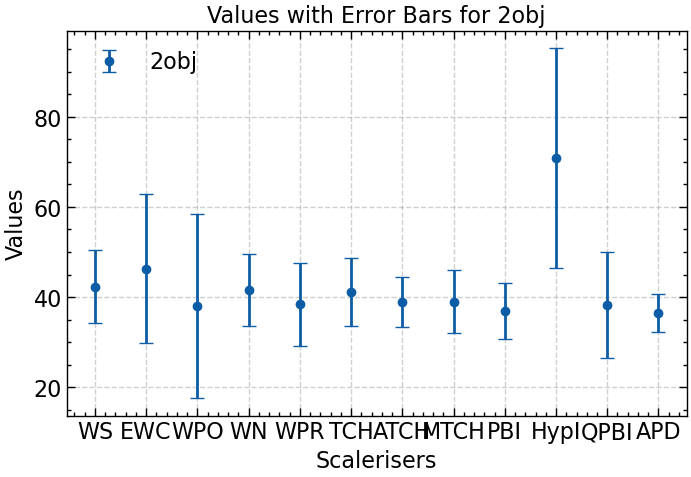

In [11]:
function_to_plot = '2obj'
plt.figure(figsize=(8, 5))

# Extract scalerisers, values, and standard deviations
scalerisers = list(dtlz1[function_to_plot].keys())
values = [dtlz1[function_to_plot][scaler][0] for scaler in scalerisers]
std_devs = [dtlz1[function_to_plot][scaler][1] for scaler in scalerisers]

# Plotting
plt.errorbar(scalerisers, values, yerr=std_devs, fmt='o', capsize=5, label=function_to_plot)
plt.title(f'Values with Error Bars for {function_to_plot}')
plt.xlabel('Scalerisers')
plt.ylabel('Values')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [12]:
import matplotlib.pyplot as plt

# Example dictionaries



# Function to plot
function_to_plot = f'{n_obj}obj'

dtlzFunction = 'dtlz2'

# Prepare the data for dtlz1
scalerisers_dtlz1 = list(dtlz2[function_to_plot].keys())
values_dtlz1 = [dtlz2[function_to_plot][scaler][0] for scaler in scalerisers_dtlz1]
std_devs_dtlz1 = [dtlz2[function_to_plot][scaler][1] for scaler in scalerisers_dtlz1]

# Prepare the data for new_optimiser
scalerisers_new = list(ESADict[dtlzFunction].keys())
values_TSDDEO = [TSDDEODict[dtlzFunction][scaler] for scaler in scalerisers_new]
values_LSADE = [LSADEDict[dtlzFunction][scaler] for scaler in scalerisers_new]
values_ESA = [ESADict[dtlzFunction][scaler] for scaler in scalerisers_new]
values_BOMM = [BOMMDict[dtlzFunction][scaler] for scaler in scalerisers_new]
values_BO = [BODict[dtlzFunction][scaler] for scaler in scalerisers_new]

# Combine all scalerisers for consistent x-axis
all_scalerisers = sorted(set(scalerisers_dtlz1 + scalerisers_new))

# Plotting
plt.figure(figsize=(12, 6))

# Plot dtlz1 with error bars
plt.errorbar(
    scalerisers_dtlz1, values_dtlz1, yerr=std_devs_dtlz1, 
    fmt='o', capsize=5, label='T.Chugh, 2019'
)

# Plot new_optimiser without error bars
plt.scatter(
    scalerisers_new, values_TSDDEO, 
    marker='X', label='TSDDEO', c='k'
)
plt.scatter(
    scalerisers_new, values_ESA, 
    marker='X', label='ESA', c='limegreen'
)
plt.scatter(
    scalerisers_new, values_LSADE, 
    marker='X', label='LSADE', c='r'
)
plt.scatter(
    scalerisers_new, values_BOMM, 
    marker='X', label='BOMM', c='orange'
)
plt.scatter(
    scalerisers_new, values_BO, 
    marker='X', label='BO', c='m'
)
# Customize the plot
plt.title(f'IGD Values, {dtlzFunction}, {function_to_plot}')
plt.xlabel('Scalarising Function')
plt.ylabel('IGD Value')
# plt.yscale('log')
# plt.ylim(25,170)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.01,1.05))
plt.tight_layout()
plt.show()


KeyError: 'WN'

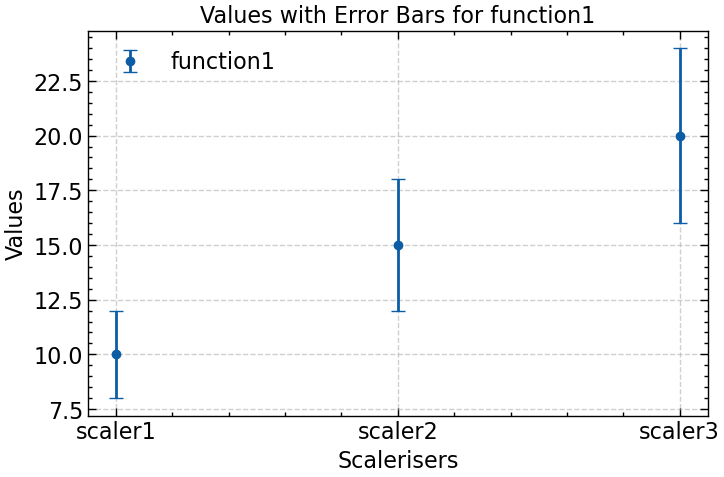

In [ ]:
import matplotlib.pyplot as plt

# Example of optimiser dictionary
optimiser = {
    'function1': {
        'scaler1': [10, 2],
        'scaler2': [15, 3],
        'scaler3': [20, 4],
    },
    'function2': {
        'scaler1': [12, 1],
        'scaler2': [18, 2.5],
        'scaler3': [25, 3],
    }
}

# Choose the function to plot
function_to_plot = 'function1'

# Extract scalerisers, values, and standard deviations
scalerisers = list(optimiser[function_to_plot].keys())
values = [optimiser[function_to_plot][scaler][0] for scaler in scalerisers]
std_devs = [optimiser[function_to_plot][scaler][1] for scaler in scalerisers]

# Plotting
plt.figure(figsize=(8, 5))
plt.errorbar(scalerisers, values, yerr=std_devs, fmt='o', capsize=5, label=function_to_plot)
plt.title(f'Values with Error Bars for {function_to_plot}')
plt.xlabel('Scalerisers')
plt.ylabel('Values')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


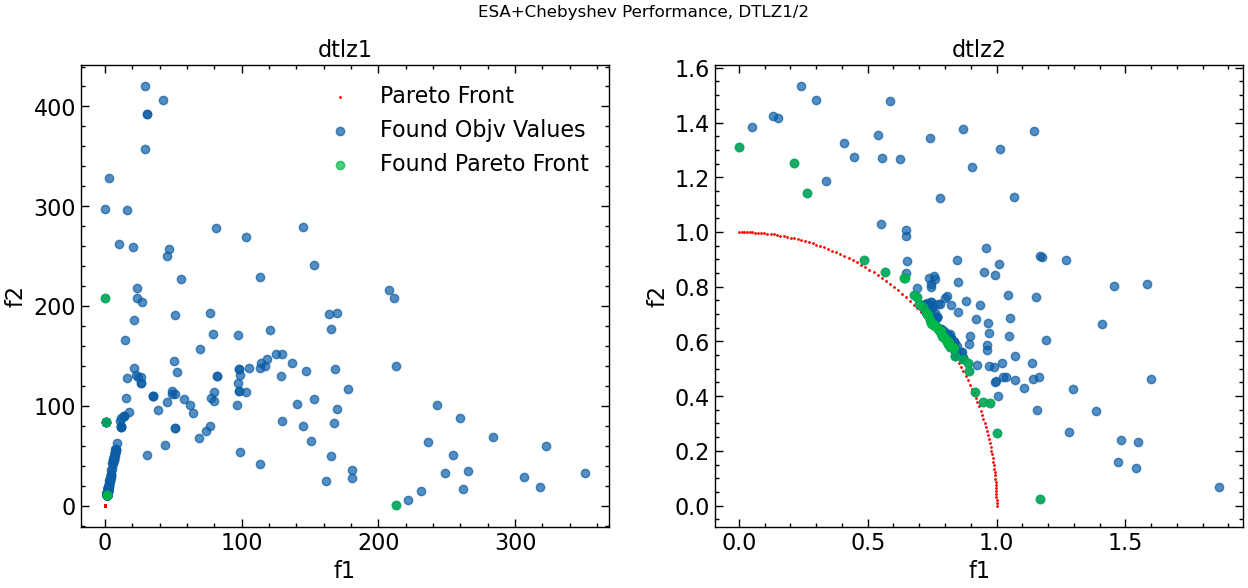

In [ ]:
#ESA Tcheb dtlz1 2obj and dtlz2 2obj
ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=100)

dtlz1 = get_problem('dtlz1', 6, 2)
dtlz2 = get_problem('dtlz2', 6, 2)

pf1 = get_problem('dtlz1').pareto_front(ref_dirs)

pf2 = get_problem('dtlz2').pareto_front(ref_dirs)

ESAObjsdtlz1 = np.loadtxt('dtlz2Obj300/ESAObjtvTargetsdtlz1chebyshev.txt')
ESAObjsdtlz2 = np.loadtxt('dtlz2Obj300/ESAObjtvTargetsdtlz2chebyshev.txt')

ESApf1 = functionBank.computeParetoShells(ESAObjsdtlz1)[0]
ESApf2 = functionBank.computeParetoShells(ESAObjsdtlz2)[0]
# print(ESApf1)
# print(ESApf2)
plt.figure(figsize=(15, 6))
plt.suptitle('ESA+Chebyshev Performance, DTLZ1/2')
plt.subplot(1,2,1)
plt.scatter(pf1[:,0], pf1[:,1], c='red', s=1, label = 'Pareto Front')
plt.scatter(ESAObjsdtlz1[:, 0], ESAObjsdtlz1[:, 1], alpha=0.7, label = 'Found Objv Values')
plt.scatter(ESApf1[:, 0], ESApf1[:, 1], alpha=0.7, label = 'Found Pareto Front')
plt.title('dtlz1')
# plt.xlim(-10,300)
# plt.ylim(-10,300)
plt.legend()
plt.xlabel('f1')
plt.ylabel('f2')

plt.subplot(1,2,2)
plt.scatter(pf2[:,0], pf2[:,1], c='red', s=1)
plt.scatter(ESAObjsdtlz2[:, 0], ESAObjsdtlz2[:, 1], alpha=0.7)
plt.scatter(ESApf2[:, 0], ESApf2[:, 1], alpha=0.7)
plt.title('dtlz2')
plt.xlabel('f1')
plt.ylabel('f2')

plt.show()


(2, 2)


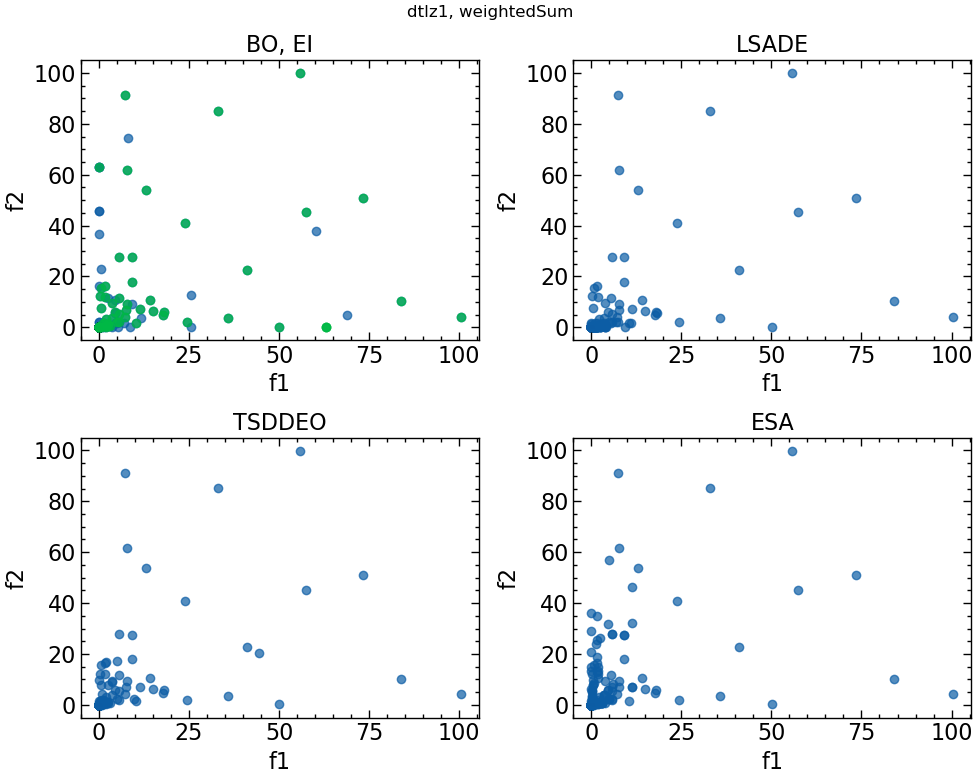

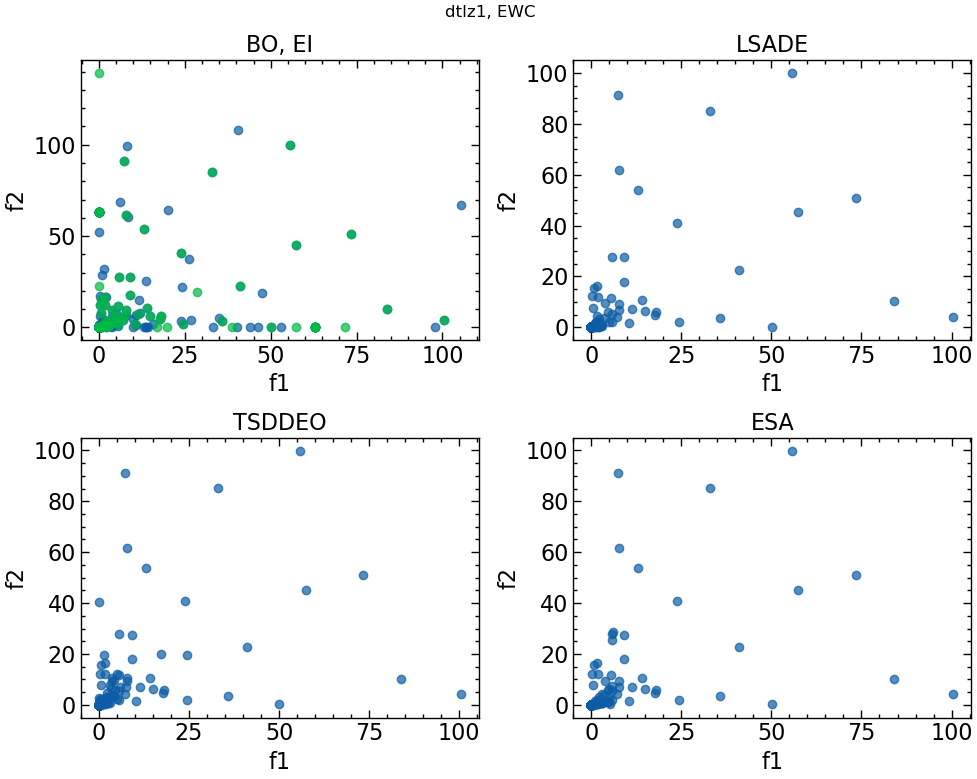

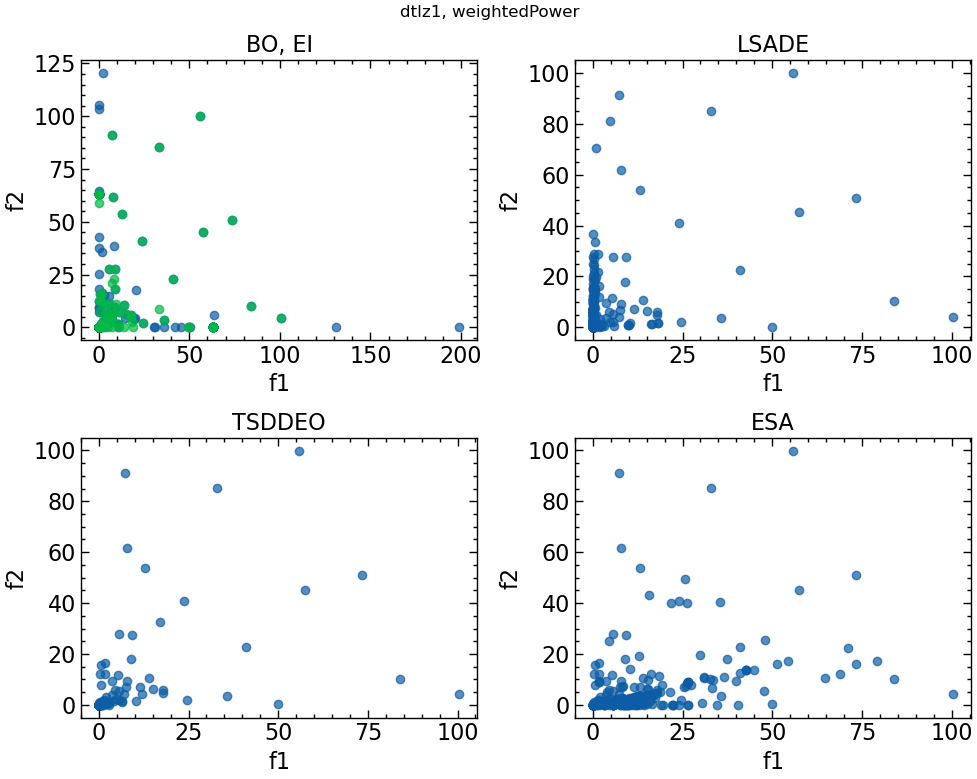

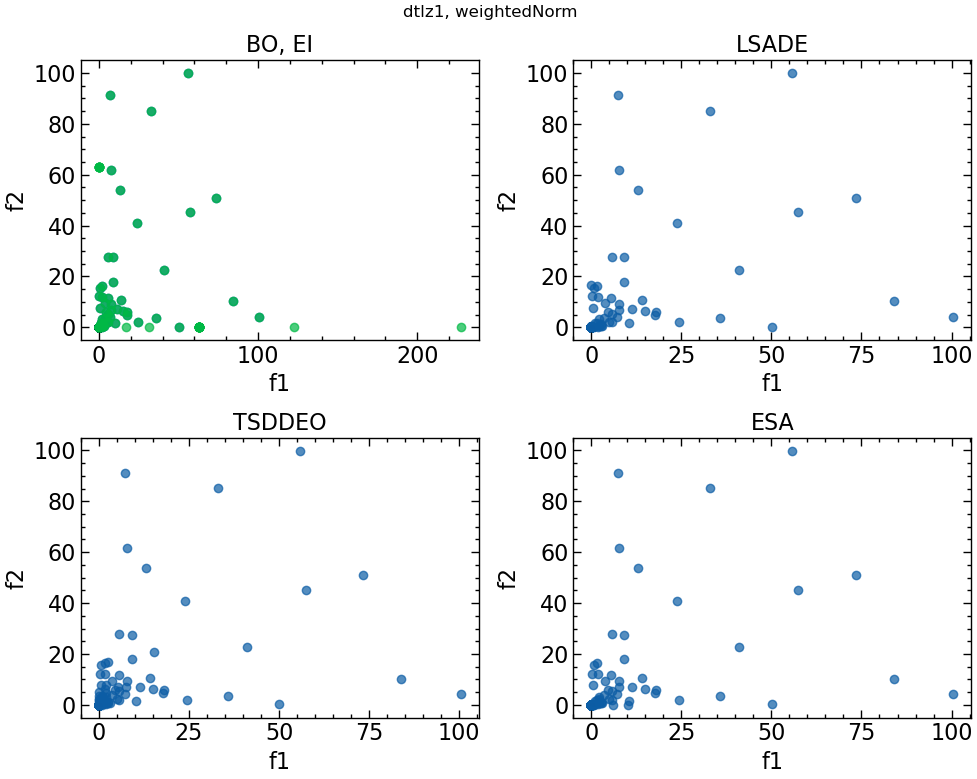

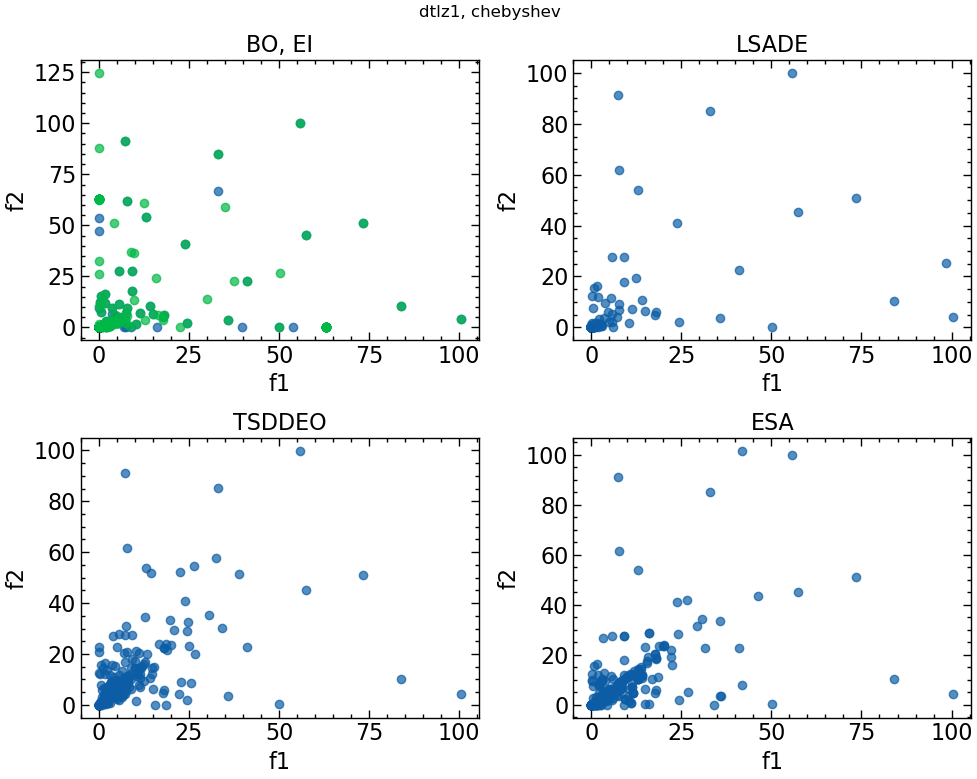

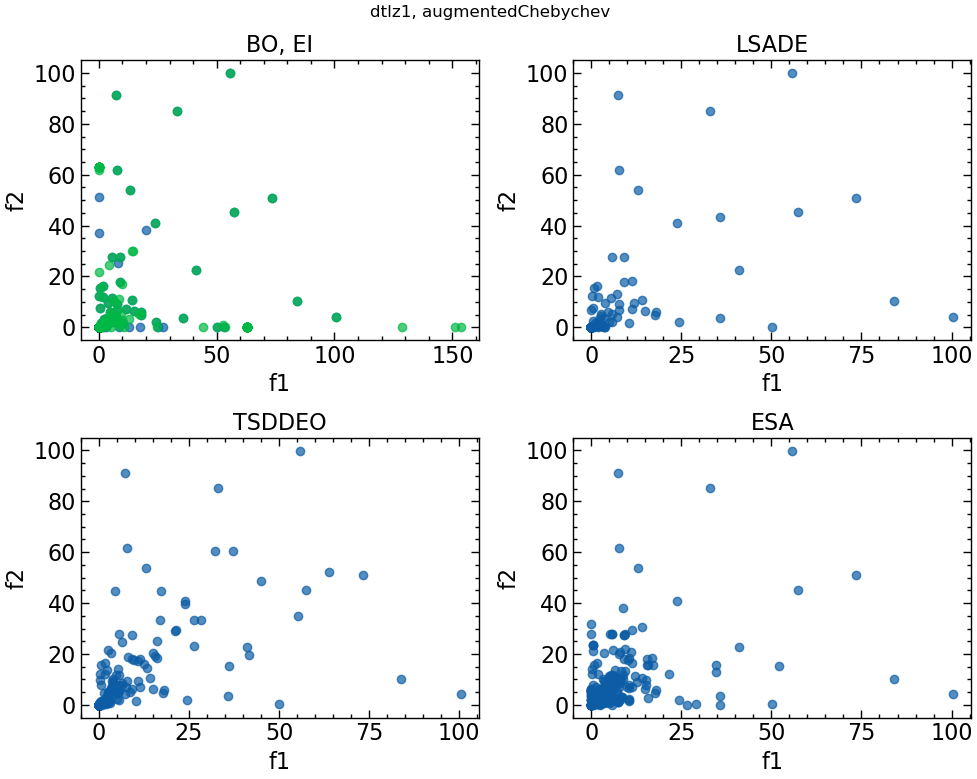

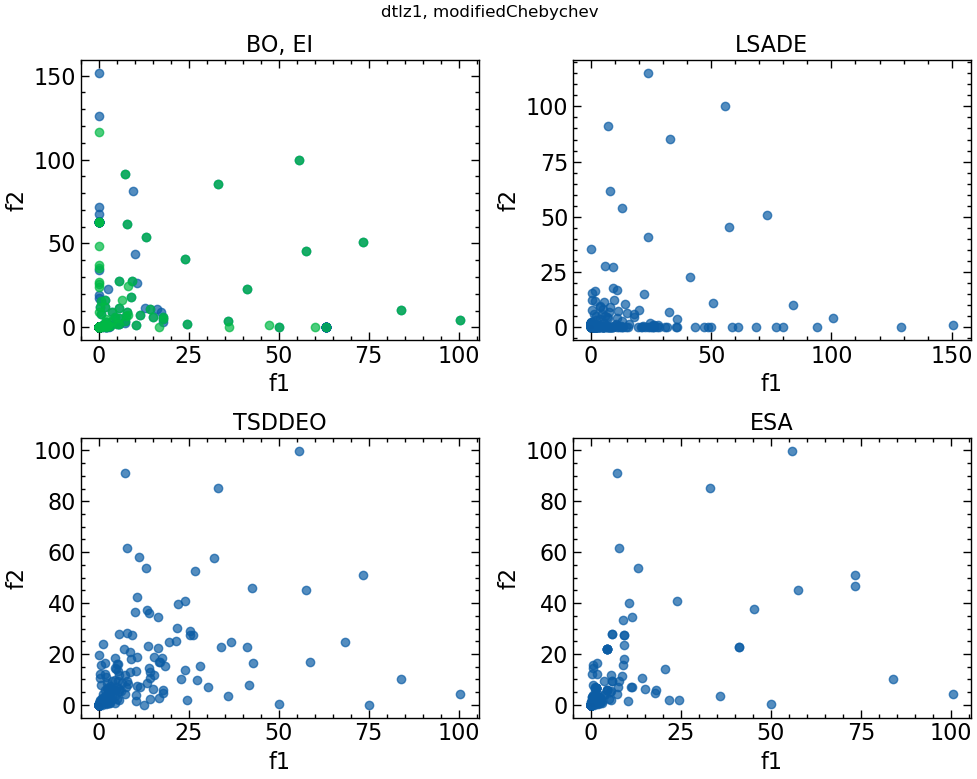

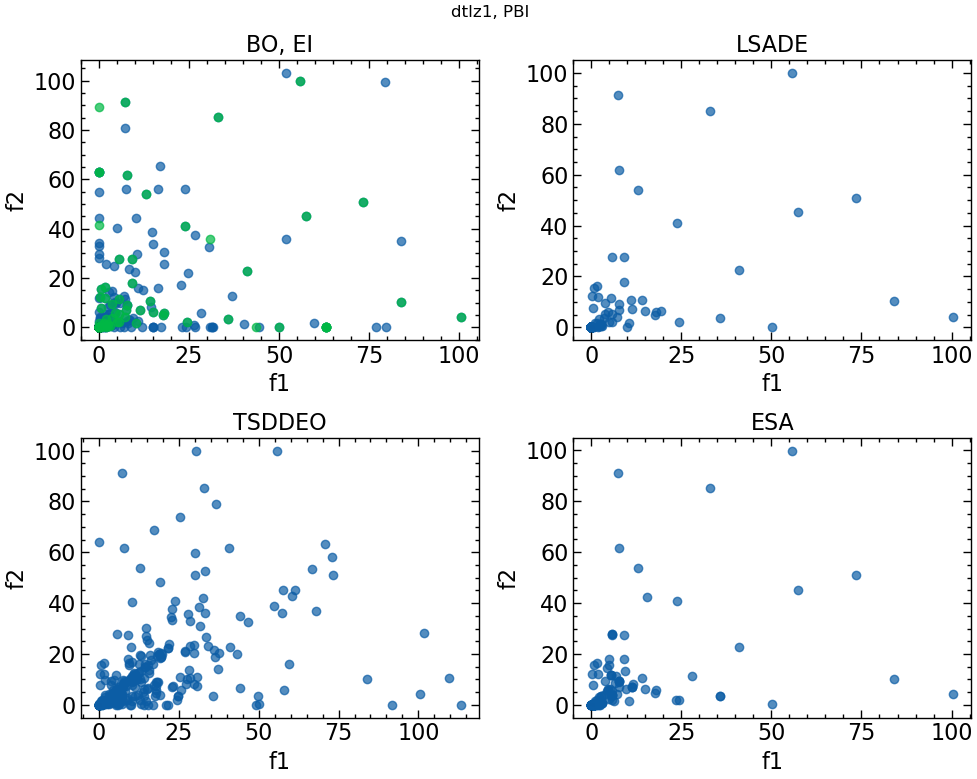

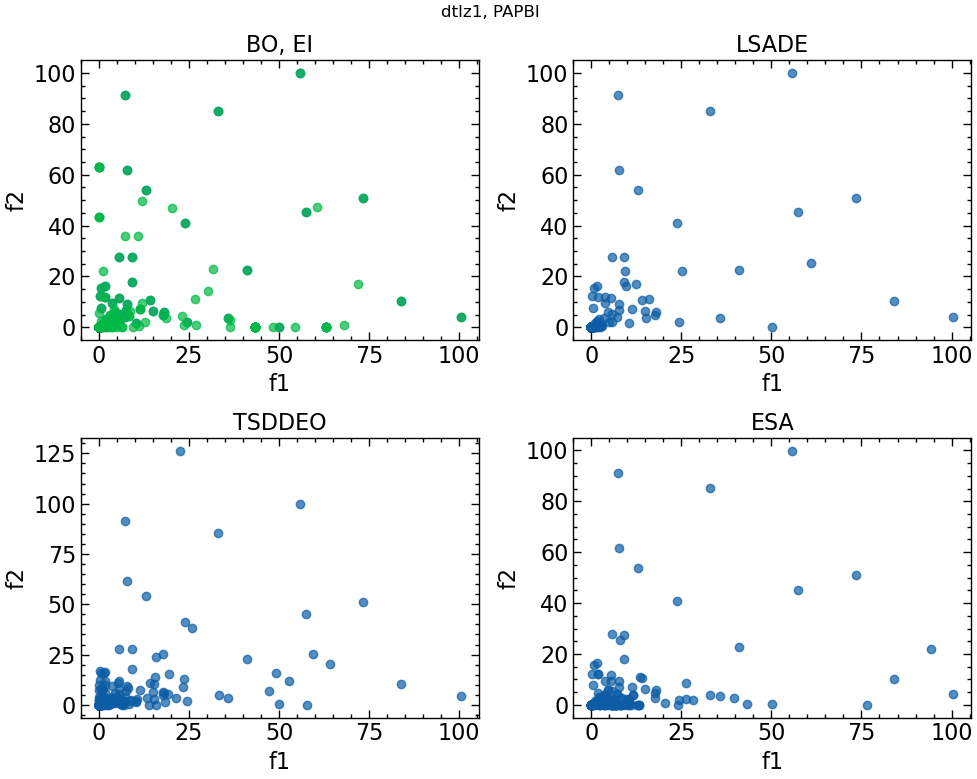

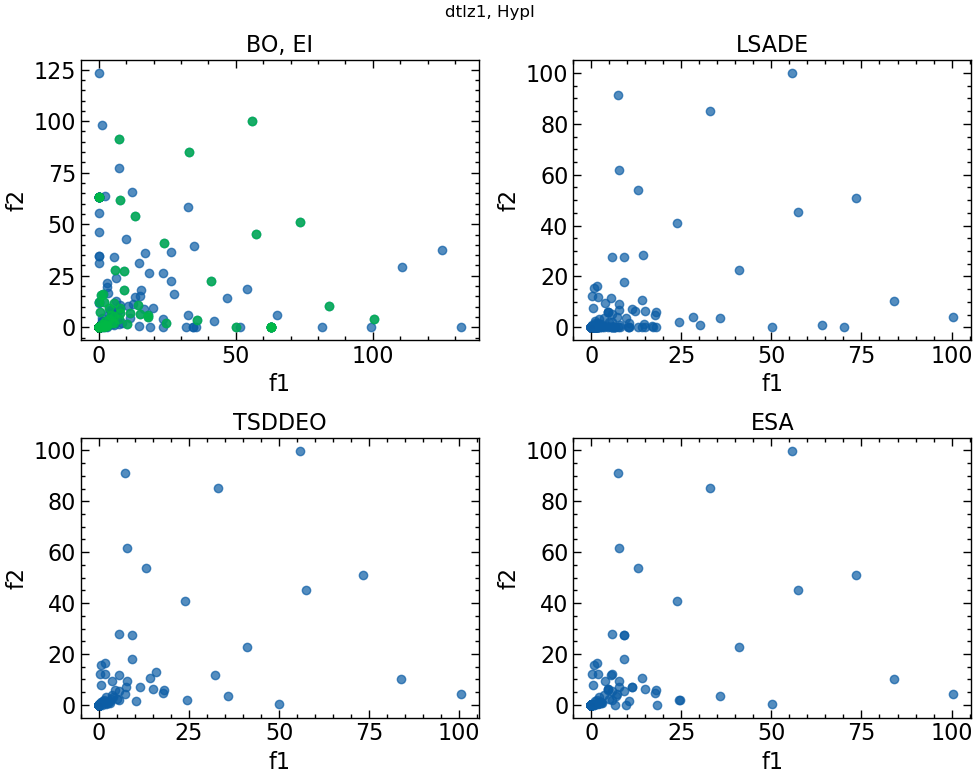

(2, 2)


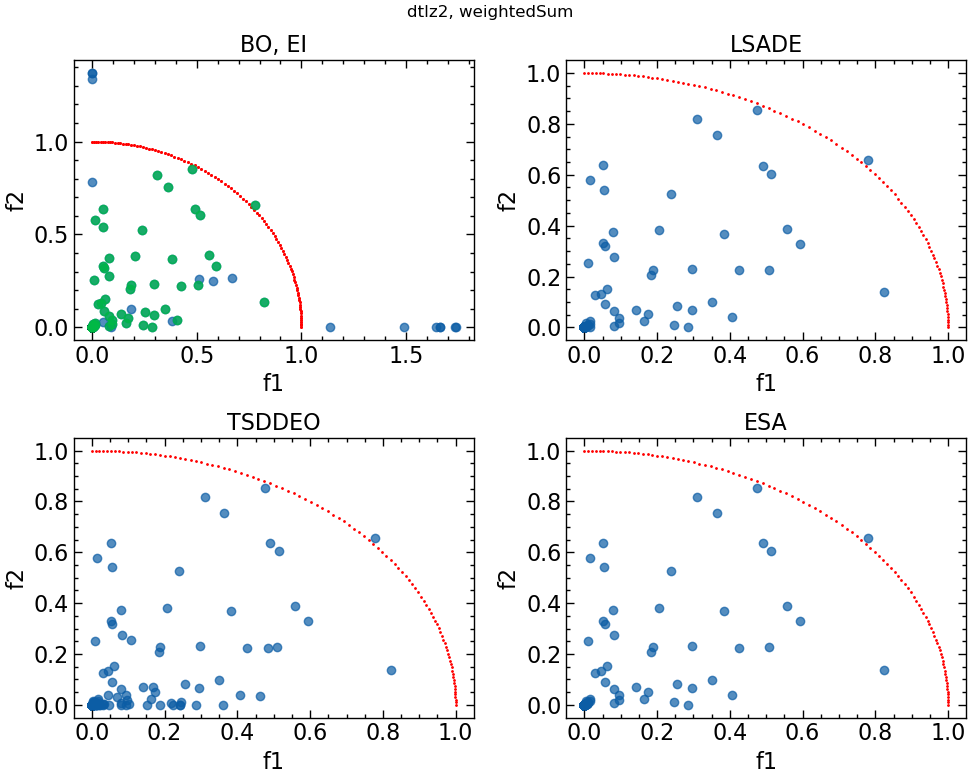

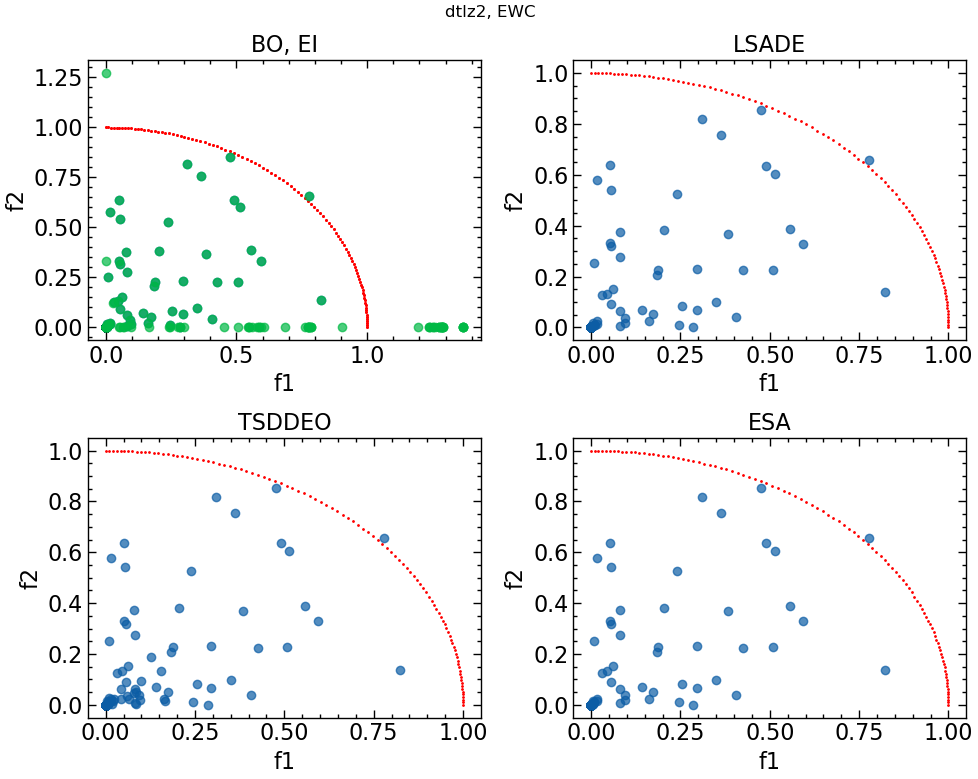

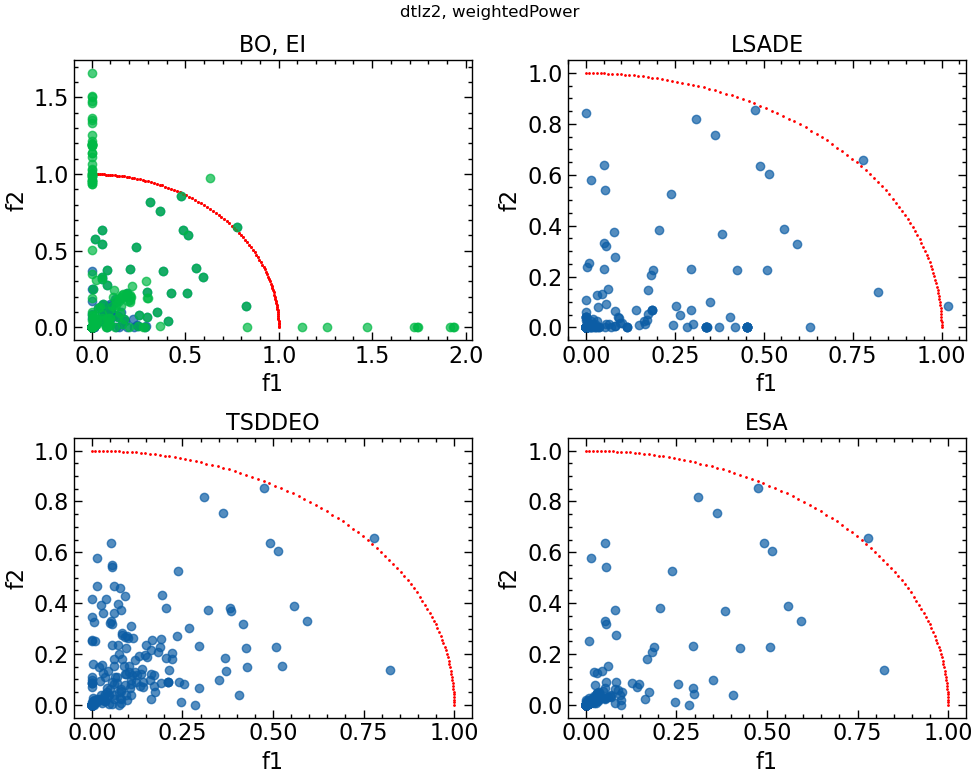

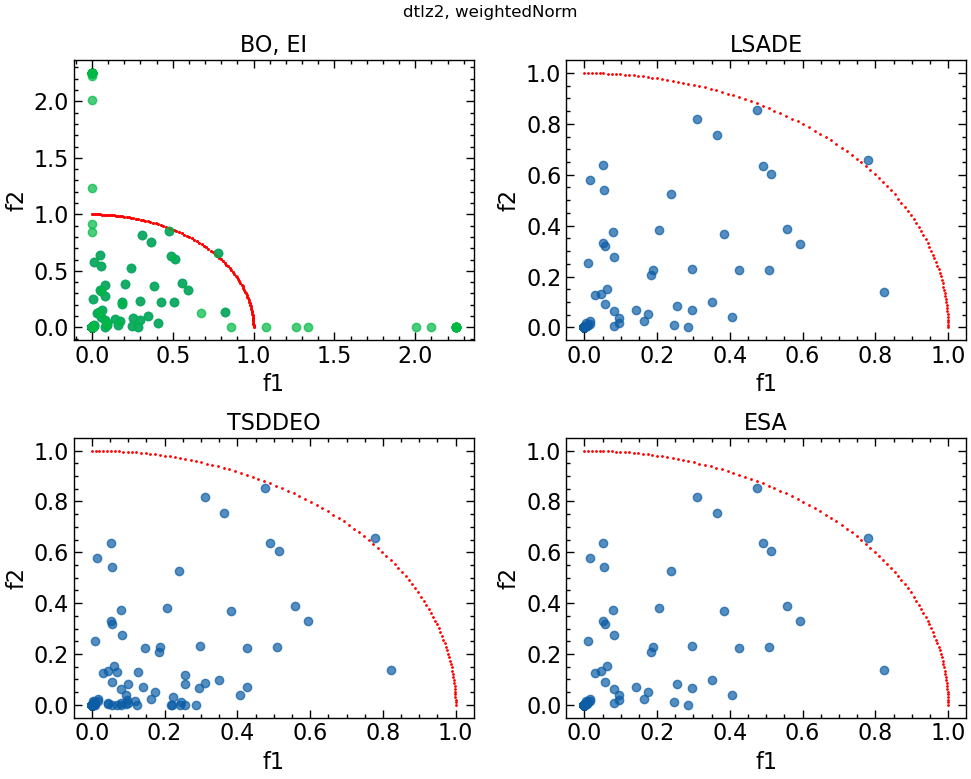

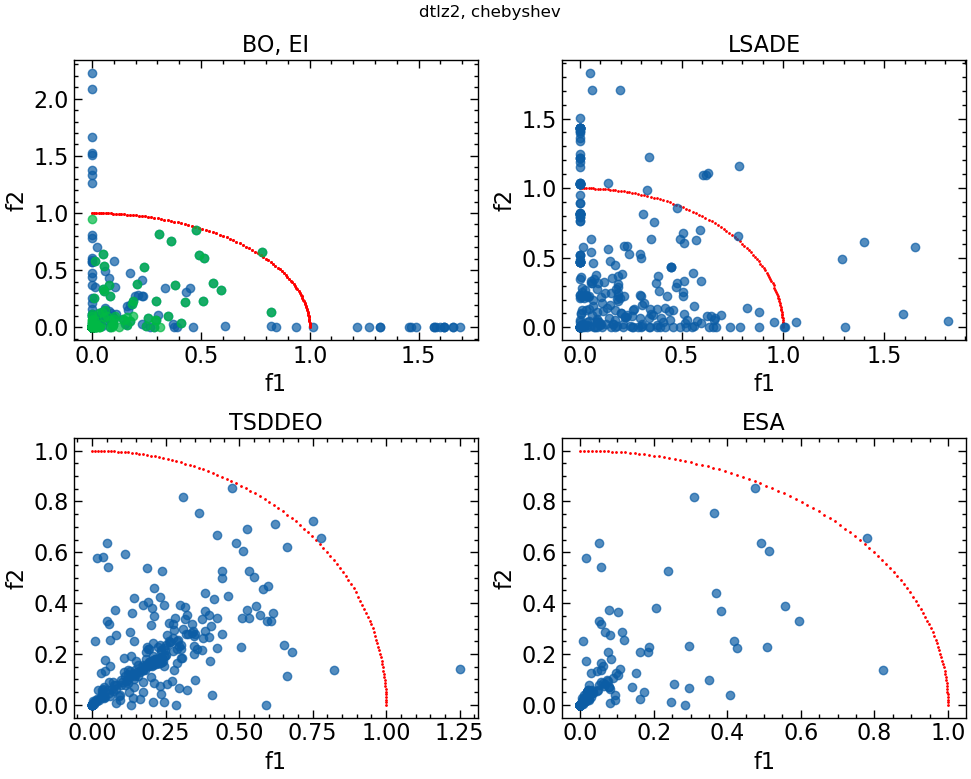

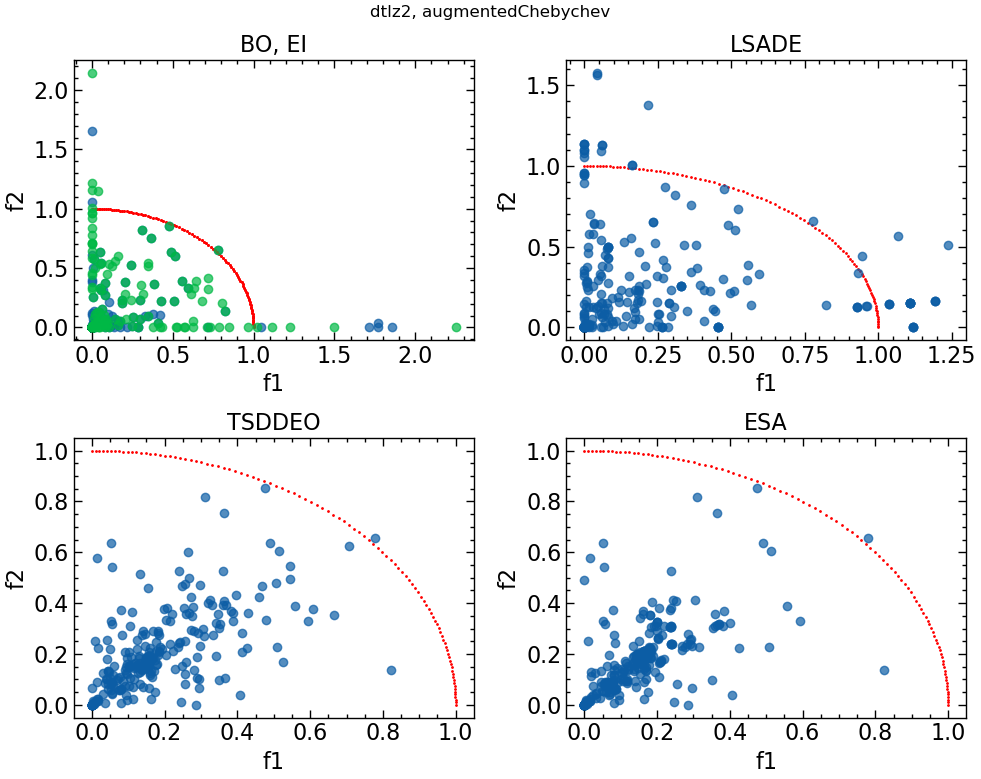

KeyboardInterrupt: 

In [ ]:
# files = glob.glob('/Users/benmoore/projects/elgarMOOOpt/dtlzRunII/*')

hyperVDict = {}

for func in dtlzProblems:

    problem = get_problem(func, n_var, n_obj)

    needed_substring = func
    plottingBounds = np.array([(0,5), (0,5)])
    print(plottingBounds.shape)

    # xMargin = abs(plottingBounds[0,0] - plottingBounds[0,1])/10
    # yMargin = abs(plottingBounds[1,0] - plottingBounds[1,1])/10
    # print(xMargin, yMargin)

    # Create a dictionary to hold the arrays
    data_arrays = {}
    # hyperVDict[f'{needed_substring}'] = {}
    # Define a lambda function to clean the file names
    clean_name = lambda name: name.replace(f'ObjtvTargets{needed_substring}', '')

    # needed_substring = "binhAndKorn"


    for file in files:
        # Skip files that contain the ignore substring
        if f'ObjtvTargets{needed_substring}' not in file:
            continue  # Skip to the next file

        # Extract the base name (without extension)
        base_name = os.path.splitext(os.path.basename(file))[0]
        # Clean the base name
        clean_base_name = clean_name(base_name)
        # Load the file into a NumPy array and store it in the dictionary
        data_arrays[clean_base_name] = np.loadtxt(file)

    #load in pareto front for current function:
    # paretoFront = np.loadtxt(f'paretoFronts/{needed_substring}Pareto.txt')
    ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=100)

    if func == 'dtlz5' or func == 'dtlz6' or func == 'dtlz7':
        paretoFront = get_problem(func).pareto_front()
    else:

        paretoFront = get_problem(func).pareto_front(ref_dirs)
    
    ind = IGD(paretoFront)


    scalarisingFunction = ['weightedSum', 'EWC', 'weightedPower', 'weightedNorm', 'chebyshev', 'augmentedChebychev', 
                    'modifiedChebychev', 'PBI', 'PAPBI', 'HypI']

    # scalarisingFunction = ['HypI']

    for scalarisingName in scalarisingFunction:
        # Access cleaned data by shortened file names
        plt.figure(figsize=(10, 8))
        plt.suptitle(f'{needed_substring}, {scalarisingName}')
        

        for name, array in data_arrays.items():

            if scalarisingName not in name:
                continue

            if scalarisingName == 'PBI':
                if 'PAPBI' in name:
                    continue
            # if 'TSDDEO' not in name:
            #     continue
            # Assuming the arrays have at least two columns: x and y
            # plt.figure(figsize=(10, 6))

            # pareto = func.computeParetoShells(array)[0]
            # refVector = np.max(pareto, axis=0)
            # HV = func.computeHypervolume(pareto, refVector)

            # hyperVDict[f'{needed_substring}'][f'{name}'] = HV
            
            if 'BO' in name:
                plt.subplot(2,2,1)
                plt.scatter(paretoFront[:,0], paretoFront[:,1], c='red', s=1)
                plt.scatter(array[:, 0], array[:, 1], label=name, alpha=0.7)
                plt.title('BO, EI')
                plt.xlabel('f1')
                plt.ylabel('f2')
                # plt.xlim(plottingBounds[0,0],plottingBounds[0,1])
                # plt.ylim(plottingBounds[1,0],plottingBounds[1,1])
                # plt.gca().margins(x=xMargin, y=yMargin, tight = None)
                # print('BO IGD =', ind(array))

            if 'LSADE' in name:
                plt.subplot(2,2,2)
                plt.scatter(paretoFront[:,0], paretoFront[:,1], c='red', s=1)
                plt.scatter(array[:, 0], array[:, 1], label=name, alpha=0.7)
                plt.title('LSADE')
                plt.xlabel('f1')
                plt.ylabel('f2')
                # plt.xlim(plottingBounds[0,0],plottingBounds[0,1])
                # plt.ylim(plottingBounds[1,0],plottingBounds[1,1])
                # plt.gca().margins(x=xMargin, y=yMargin, tight = None)
                # print('LSADE IGD =', ind(array))


            if 'TSDDEO' in name:
                plt.subplot(2,2,3)
                plt.scatter(paretoFront[:,0], paretoFront[:,1], c='red', s=1)
                plt.scatter(array[:, 0], array[:, 1], label=name, alpha=0.7)
                plt.title('TSDDEO')
                plt.xlabel('f1')
                plt.ylabel('f2')
                # plt.xlim(plottingBounds[0,0],plottingBounds[0,1])
                # plt.ylim(plottingBounds[1,0],plottingBounds[1,1])
                # plt.gca().margins(x=xMargin, y=yMargin, tight = None)
                # print('TSDDEO IGD =', ind(array))

            if 'ESA' in name:
                plt.subplot(2,2,4)
                plt.scatter(paretoFront[:,0], paretoFront[:,1], c='red', s=1)
                plt.scatter(array[:, 0], array[:, 1], label=name, alpha=0.7)
                plt.title('ESA')
                plt.xlabel('f1')
                plt.ylabel('f2')
                # plt.xlim(plottingBounds[0,0],plottingBounds[0,1])
                # plt.ylim(plottingBounds[1,0],plottingBounds[1,1])  
                # plt.gca().margins(x=xMargin, y=yMargin, tight = None)
                # print('ESA IGD =', ind(array))

            # plt.legend()
            # plt.xlabel('X-axis')
            # plt.ylabel('Y-axis')
            # plt.xlim(0,550)
            # plt.ylim(-500,100)
            # plt.title('Scatter Plot of All Arrays')
            # # plt.grid(True)
            # plt.show()

        # Add legend, labels, and title
        # plt.legend()
        # plt.xlabel('X-axis')
        # plt.ylabel('Y-axis')
        # plt.title('Scatter Plot of All Arrays')
        # plt.xlim(-10,550)
        # plt.ylim(-500,100)
        # plt.grid(True)


        plt.tight_layout()
        # os.makedirs(f'/Users/benmoore/projects/elgarMOOOpt/{needed_substring}Plots', exist_ok=True)
        # plt.savefig(f'{needed_substring}Plots/{scalarisingName}.png')
        plt.show()
        # plt.close()


    # image_files = sorted(glob.glob(f"{needed_substring}Plots/*.png"))
    # # print('here')
    # images = [Image.open(img) for img in image_files]

    # # Step 3: Save images as a GIF
    # if images:
    #     # 'duration' is the time each frame stays on screen (milliseconds)
    #     images[0].save(
    #         f"{needed_substring}.gif",
    #         save_all=True,
    #         append_images=images[1:],  # Include the rest of the images
    #         duration=2000,               # Duration of each frame in milliseconds
    #         loop=0                       # 0 means loop indefinitely
    #     )


In [ ]:
files = glob.glob('/Users/benmoore/projects/elgarMOOOpt/txtFilesRunIX/*')

hyperVDict = {}

for key, value in functionDict.items():


    needed_substring = key.__name__


    # Create a dictionary to hold the arrays
    data_arrays = {}
    hyperVDict[f'{needed_substring}'] = {}
    # Define a lambda function to clean the file names
    clean_name = lambda name: name.replace(f'ObjtvTargets{needed_substring}', '')

    # needed_substring = "binhAndKorn"


    for file in files:
        # Skip files that contain the ignore substring
        if f'ObjtvTargets{needed_substring}' not in file:
            continue  # Skip to the next file

        # Extract the base name (without extension)
        base_name = os.path.splitext(os.path.basename(file))[0]
        # Clean the base name
        clean_base_name = clean_name(base_name)
        # Load the file into a NumPy array and store it in the dictionary
        data_arrays[clean_base_name] = np.loadtxt(file)

    #load in pareto front for current function:
    paretoFront = np.loadtxt(f'paretoFronts/{needed_substring}Pareto.txt')
    # Create a boolean mask for non-NaN values in the outputs array
    # print(paretoFront.shape)

    paretoFront = paretoFront[~np.isnan(paretoFront).any(axis=1)]
    # print(paretoFront)



    SAEAList = ['BO', 'LSADE', 'ESA', 'TSDDEO']
    hyperVDict[f'{needed_substring}']['pareto'] = {}
    for SAEA in SAEAList:

        hyperVDict[f'{needed_substring}'][f'{SAEA}'] = {}

        for name, array in data_arrays.items():
            print(name, array.shape)
            if SAEA in name:

                scalariser = np.char.split(name, SAEA)

                pareto = func.computeParetoShells(array)[0]
                refVector = np.max(paretoFront, axis=0)
                # print(refVector)
                HV = func.computeHypervolume(pareto, refVector)



                # hyperVDict[f'{needed_substring}'][f'{name}'] = HV
                if scalariser.item()[1] == 'augmentedChebychev':
                    scalariser.item()[1] = 'augChebychev'

                hyperVDict[f'{needed_substring}'][f'{SAEA}'][f'{scalariser.item()[1]}'] = HV
            
            paretoHV = func.computeHypervolume(paretoFront, refVector)

            hyperVDict[f'{needed_substring}']['pareto'][f'{scalariser.item()[1]}'] = paretoHV


# print(hyperVDict)

# Get the total number of keys (plots)
num_plots = len(hyperVDict.keys())

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(2,3, figsize=(15, 12))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

handles, labels = None, None  # Variables to store handles and labels from one subplot

for i, (key, value) in enumerate(hyperVDict.items()):
    ax = axes[i]  # Select the corresponding subplot
    ax.set_title(f'Found Hypervolumes, {key}')
    
    # Get a consistent order of keys across all inner dictionaries
    all_inner_keys = list(value.keys())
    all_tKeys = sorted(set(k for innerKey in all_inner_keys for k in value[innerKey].keys()))
    
    for innerKey, innerValue in value.items():
        # Use the sorted tKeys for consistent ordering
        tKeys = all_tKeys
        tValues = [innerValue[k] for k in tKeys]  # Directly get the values
        
        # Plot the data
        line, = ax.plot(tKeys, np.array(tValues) / (value['pareto']['EWC']), label=f'{innerKey}')
        ax.scatter(tKeys, np.array(tValues) / (value['pareto']['EWC']))
    
    if i == 0:  # Only collect handles and labels from the first subplot
        handles, labels = ax.get_legend_handles_labels()

    ax.set_xticks(tKeys)  # Explicitly set all x-axis tick positions
    ax.set_xticklabels(tKeys, rotation=45, ha='right')  # Ensure all labels are displayed
    ax.set_xlabel('Scalarising Function')
    ax.set_ylabel('Normalised Pareto Hypervolume')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Create a single legend using handles and labels from the first subplot
fig.legend(
    handles,
    labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.98),
    ncol=5,
    frameon=False,
    fontsize='large'
)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the legend
plt.savefig('runVII.png')
plt.show()

NameError: name 'functionDict' is not defined

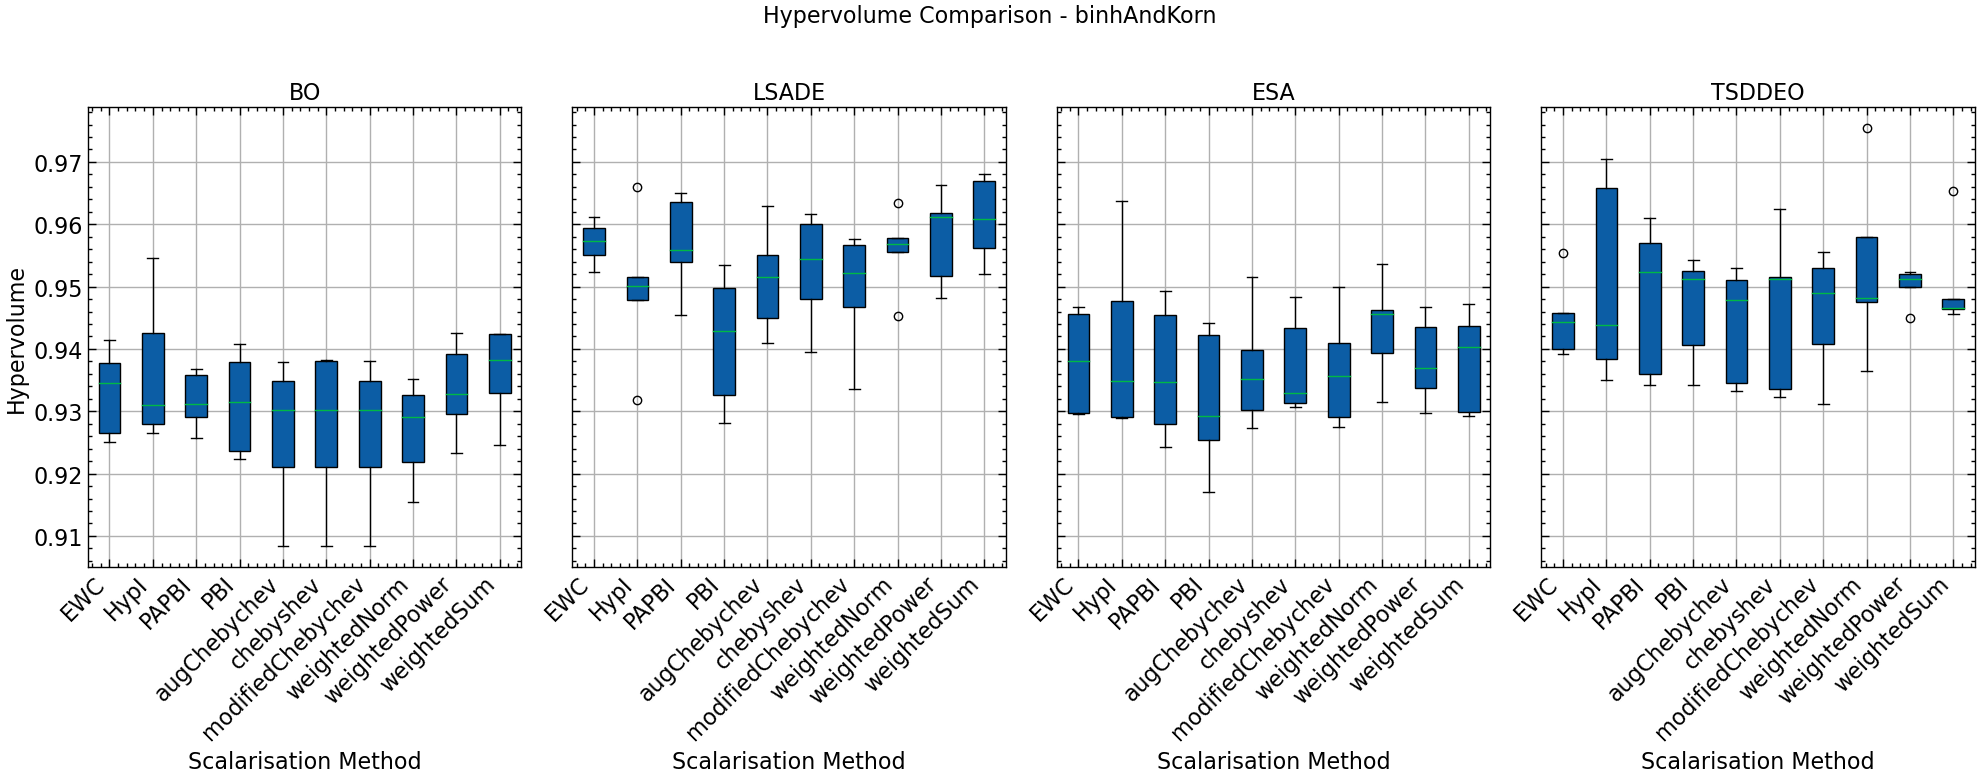

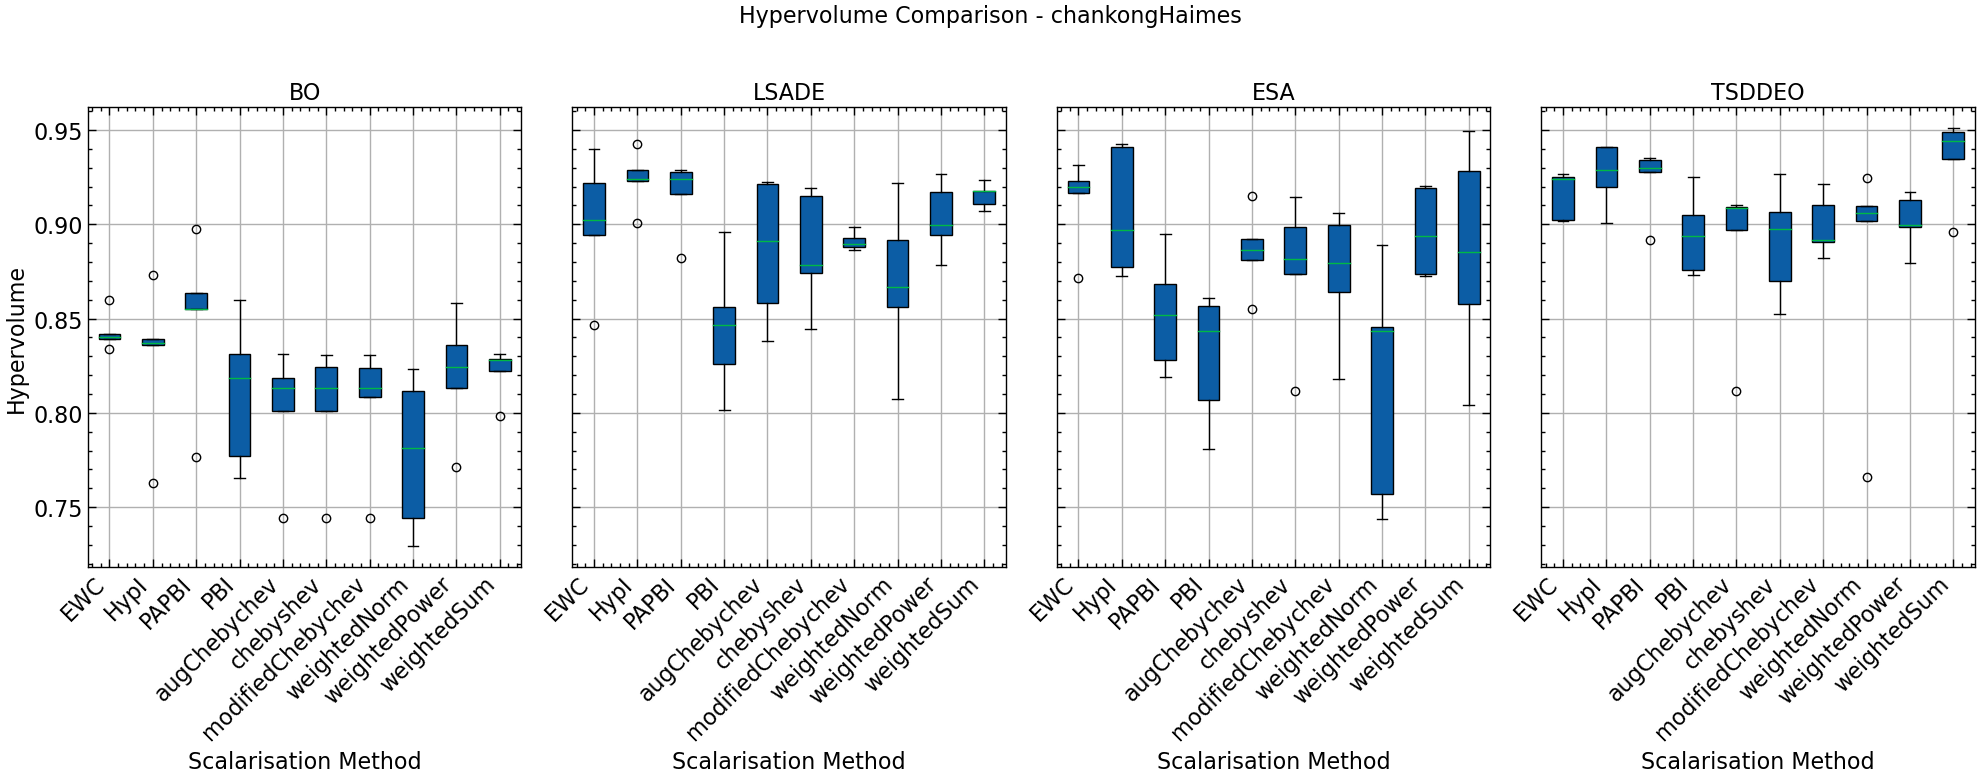

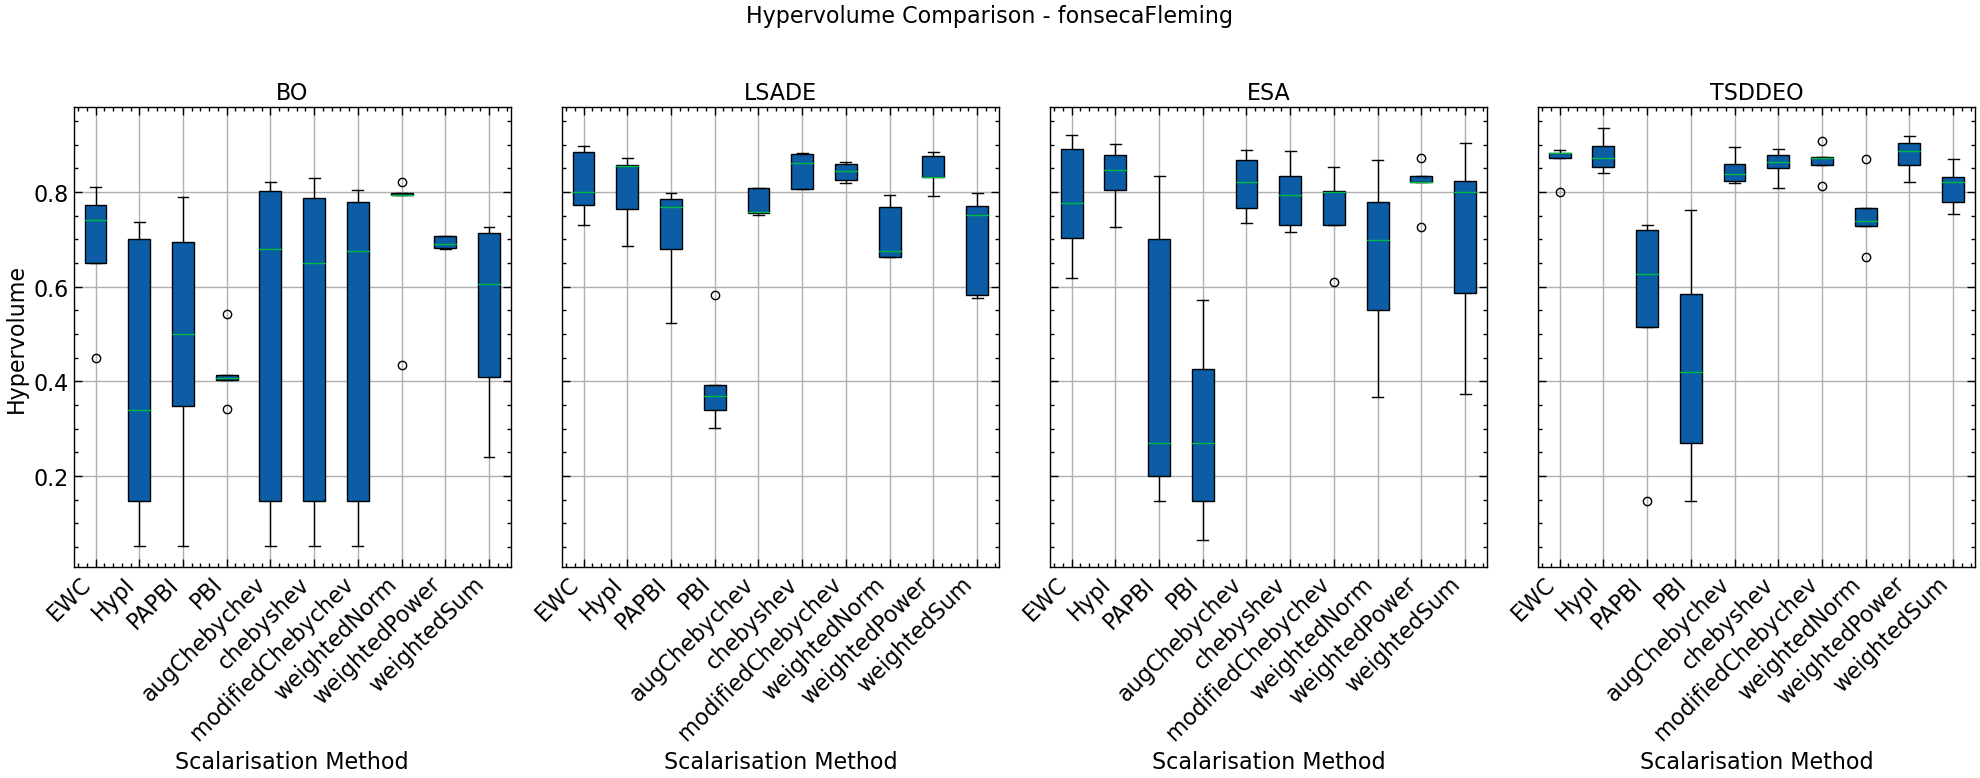

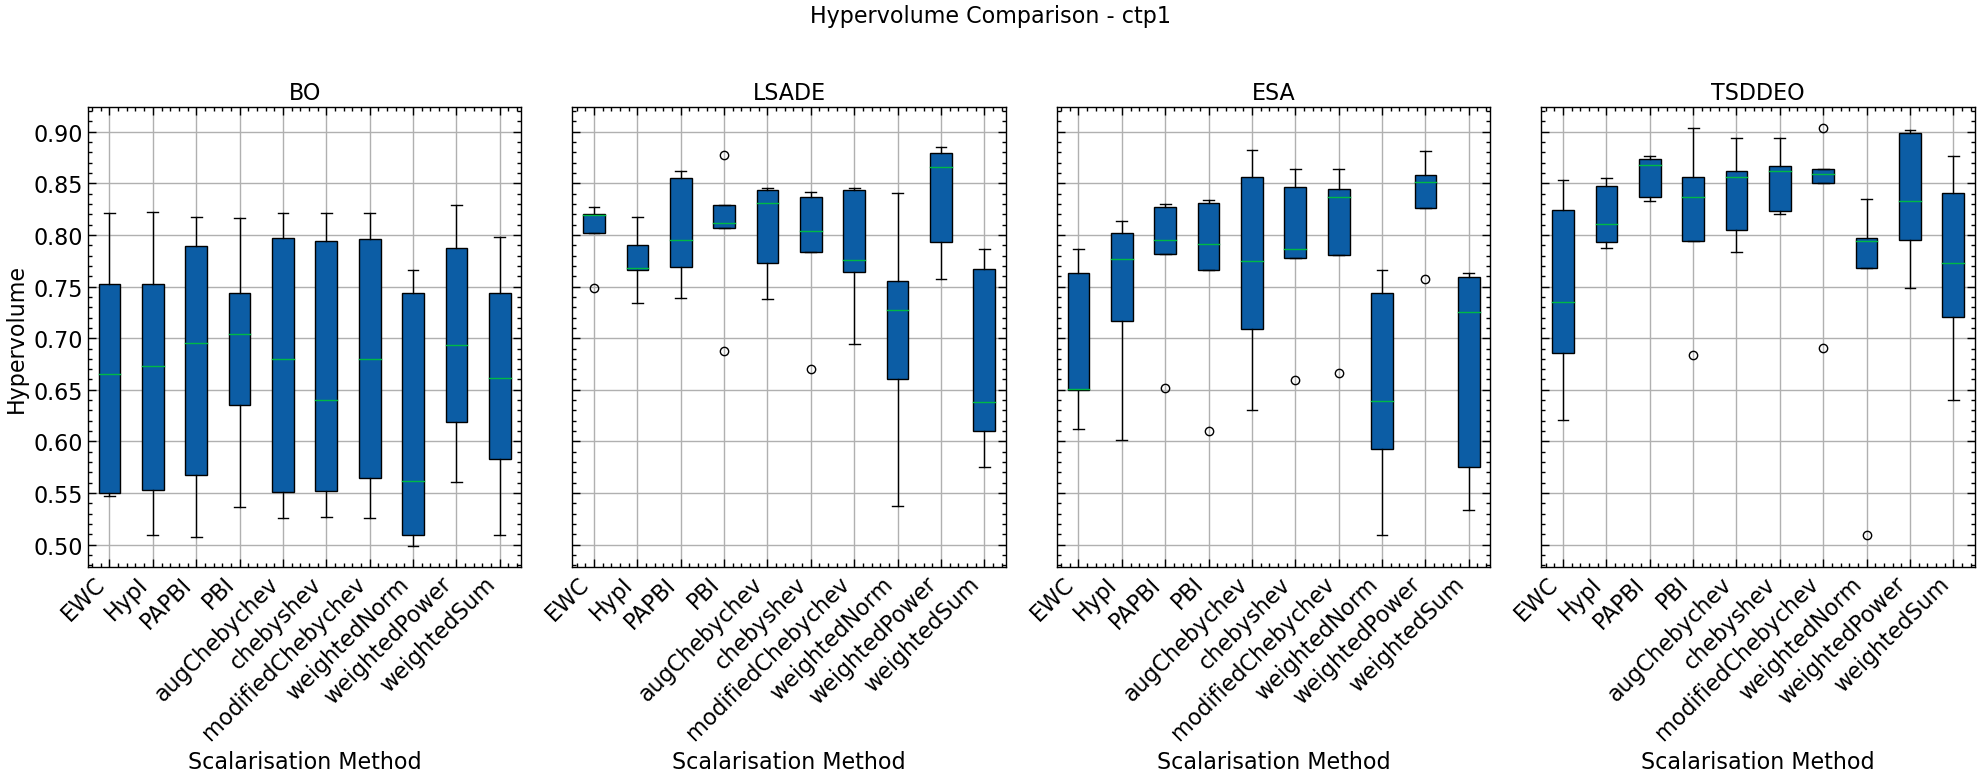

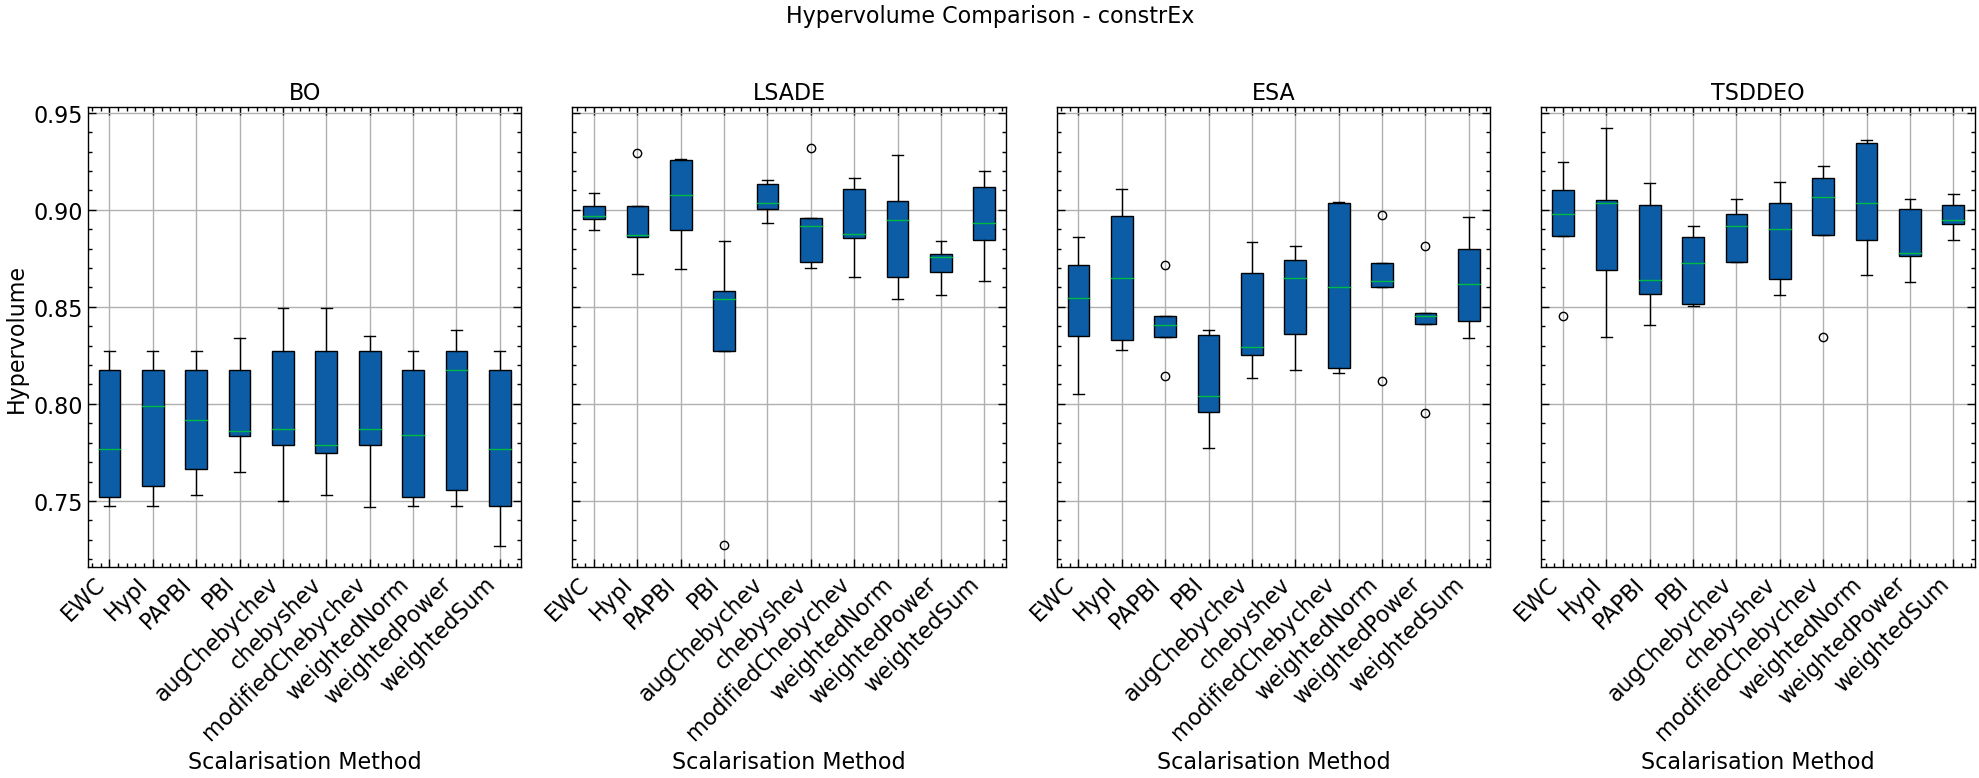

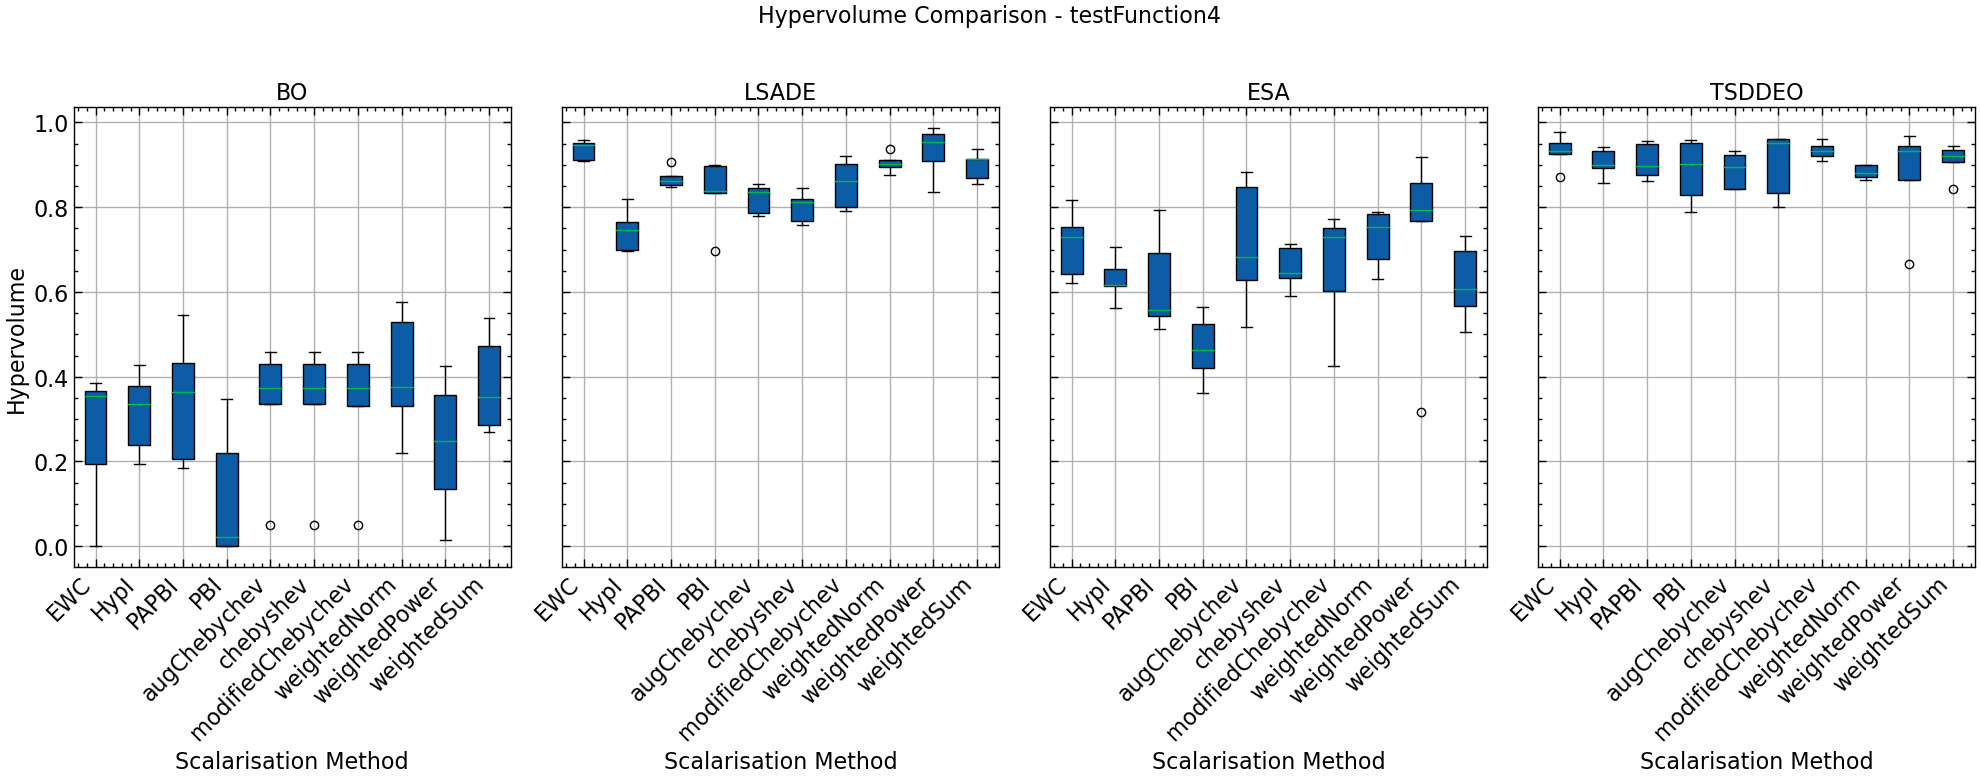

{'BO': {'EWC': array([0.9376717 , 0.92506693, 0.9344886 , 0.94142176, 0.92657974,
       0.85997866, 0.83938972, 0.84049896, 0.83402339, 0.84210189,
       0.65109917, 0.45037901, 0.80988642, 0.77194392, 0.74041631,
       0.82139941, 0.54749178, 0.66528604, 0.75279066, 0.55036462,
       0.74738283, 0.75187631, 0.82703714, 0.77691848, 0.81735057,
       0.        , 0.35515204, 0.19460883, 0.36599208, 0.38593086]), 'HypI': array([0.95452611, 0.92644199, 0.93097182, 0.94250596, 0.92792082,
       0.83606291, 0.83916487, 0.76279013, 0.87294867, 0.83686605,
       0.3388323 , 0.14821639, 0.69983686, 0.73751719, 0.05184459,
       0.82259051, 0.50944098, 0.67293729, 0.75209129, 0.5526455 ,
       0.74738283, 0.75764223, 0.82703714, 0.79912712, 0.81735057,
       0.23977588, 0.33671164, 0.19325703, 0.37735895, 0.42851751]), 'PAPBI': array([0.93683261, 0.92909106, 0.93118652, 0.93588785, 0.92564079,
       0.86344399, 0.85512981, 0.77654818, 0.89728684, 0.85535099,
       0.4993545 , 0.34716

In [ ]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

# List of dataset folders
dataset_folders = [
    '/Users/benmoore/projects/elgarMOOOpt/txtFilesRunIV/*',
    '/Users/benmoore/projects/elgarMOOOpt/txtFilesRunV/*',
    '/Users/benmoore/projects/elgarMOOOpt/txtFilesRunVI/*',
    '/Users/benmoore/projects/elgarMOOOpt/txtFilesRunVII/*',
    '/Users/benmoore/projects/elgarMOOOpt/txtFilesRunVIII/*'
    # '/Users/benmoore/projects/elgarMOOOpt/txtFilesRunIX/*'
]

# Initialize a dictionary to store results across datasets
all_hypervolumes = {}

# Iterate over dataset folders
for dataset_folder in dataset_folders:
    files = glob.glob(dataset_folder)

    hyperVDict = {}

    for key, value in functionDict.items():

        needed_substring = key.__name__

        # Create a dictionary to hold the arrays
        data_arrays = {}
        hyperVDict[f'{needed_substring}'] = {}
        # Define a lambda function to clean the file names
        clean_name = lambda name: name.replace(f'ObjtvTargets{needed_substring}', '')

        for file in files:
            # Skip files that contain the ignore substring
            if f'ObjtvTargets{needed_substring}' not in file:
                continue  # Skip to the next file

            # Extract the base name (without extension)
            base_name = os.path.splitext(os.path.basename(file))[0]
            # Clean the base name
            clean_base_name = clean_name(base_name)
            # Load the file into a NumPy array and store it in the dictionary
            data_arrays[clean_base_name] = np.loadtxt(file)

        # Load in pareto front for current function:
        paretoFront = np.loadtxt(f'paretoFronts/{needed_substring}Pareto.txt')

        # Remove rows with NaN values
        paretoFront = paretoFront[~np.isnan(paretoFront).any(axis=1)]

        SAEAList = ['BO', 'LSADE', 'ESA', 'TSDDEO']
        hyperVDict[f'{needed_substring}']['pareto'] = {}

        for SAEA in SAEAList:

            hyperVDict[f'{needed_substring}'][f'{SAEA}'] = {}

            for name, array in data_arrays.items():
                if SAEA in name:

                    scalariser = np.char.split(name, SAEA)

                    pareto = func.computeParetoShells(array)[0]
                    refVector = np.max(paretoFront, axis=0)
                    HV = func.computeHypervolume(pareto, refVector)

                    if scalariser.item()[1] == 'augmentedChebychev':
                        scalariser.item()[1] = 'augChebychev'

                    scalariser_name = scalariser.item()[1]
                    
                    # Store hypervolume values for box plot
                    if needed_substring not in all_hypervolumes:
                        all_hypervolumes[needed_substring] = {}
                    if SAEA not in all_hypervolumes[needed_substring]:
                        all_hypervolumes[needed_substring][SAEA] = {}
                    if scalariser_name not in all_hypervolumes[needed_substring][SAEA]:
                        all_hypervolumes[needed_substring][SAEA][scalariser_name] = []

                    all_hypervolumes[needed_substring][SAEA][scalariser_name].append(HV)

                paretoHV = func.computeHypervolume(paretoFront, refVector)

                hyperVDict[f'{needed_substring}']['pareto'][scalariser_name] = paretoHV


# print(all_hypervolumes)

finalBoxPlotDict = {}

# Extract all unique scalariser names across all functions and SAEA methods
global_labels = sorted({scalariser for scalarisers_by_function in all_hypervolumes.values()
                        for scalarisers in scalarisers_by_function.values()
                        for scalariser in scalarisers.keys()})

for saea, scalarisers_by_function in all_hypervolumes.items():
    functions = list(scalarisers_by_function.keys())
    num_functions = len(functions)
    # print(saea, scalarisers_by_function)

    fig, axs = plt.subplots(1, num_functions, figsize=(5 * num_functions, 8), sharey=True)
    if num_functions == 1:
        axs = [axs]  # Ensure axs is iterable when there's only one subplot

    for ax, function_name in zip(axs, functions):
        scalarisers = scalarisers_by_function[function_name]
        # print(scalarisers)
        # Prepare data for box plot
        boxplot_data = []
        for label in global_labels:
            # print(function_name)
            # print(label)

            if function_name not in finalBoxPlotDict:
                finalBoxPlotDict[function_name] = {}
            if label not in finalBoxPlotDict[function_name]:
                finalBoxPlotDict[function_name][label] = []
            # Ensure the same order of labels by aligning with `global_labels`
            hv_values = scalarisers.get(label, [])  # Use an empty list if the scalariser is not present
            # print(hv_values / hyperVDict[f'{saea}']['pareto']['EWC'])
            # finalBoxPlotDict[function_name][label].append(hv_values / hyperVDict[f'{saea}']['pareto']['EWC'])
            finalBoxPlotDict[function_name][label] = np.hstack(
                (finalBoxPlotDict[function_name][label], (hv_values / hyperVDict[f'{saea}']['pareto']['EWC']))
            )
            
            boxplot_data.append(hv_values / hyperVDict[f'{saea}']['pareto']['EWC'])
        
        # if function_name not in finalBoxPlotDict:
        #     finalBoxPlotDict[function_name] = {}
        # if

        # Create the box plot
        ax.boxplot(boxplot_data, labels=global_labels, patch_artist=True)
        ax.set_xticklabels(global_labels, rotation=45, ha='right')  # Ensure all labels are displayed

        ax.set_title(f'{function_name}')
        ax.set_xlabel('Scalarisation Method')
        ax.grid(True)

    axs[0].set_ylabel('Hypervolume')
    fig.suptitle(f'Hypervolume Comparison - {saea}', fontsize=16)

    # Save the plot or display it
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    # plt.savefig(f'boxplots/combined_{saea}_hypervolume.png')
    plt.show()

print(finalBoxPlotDict)

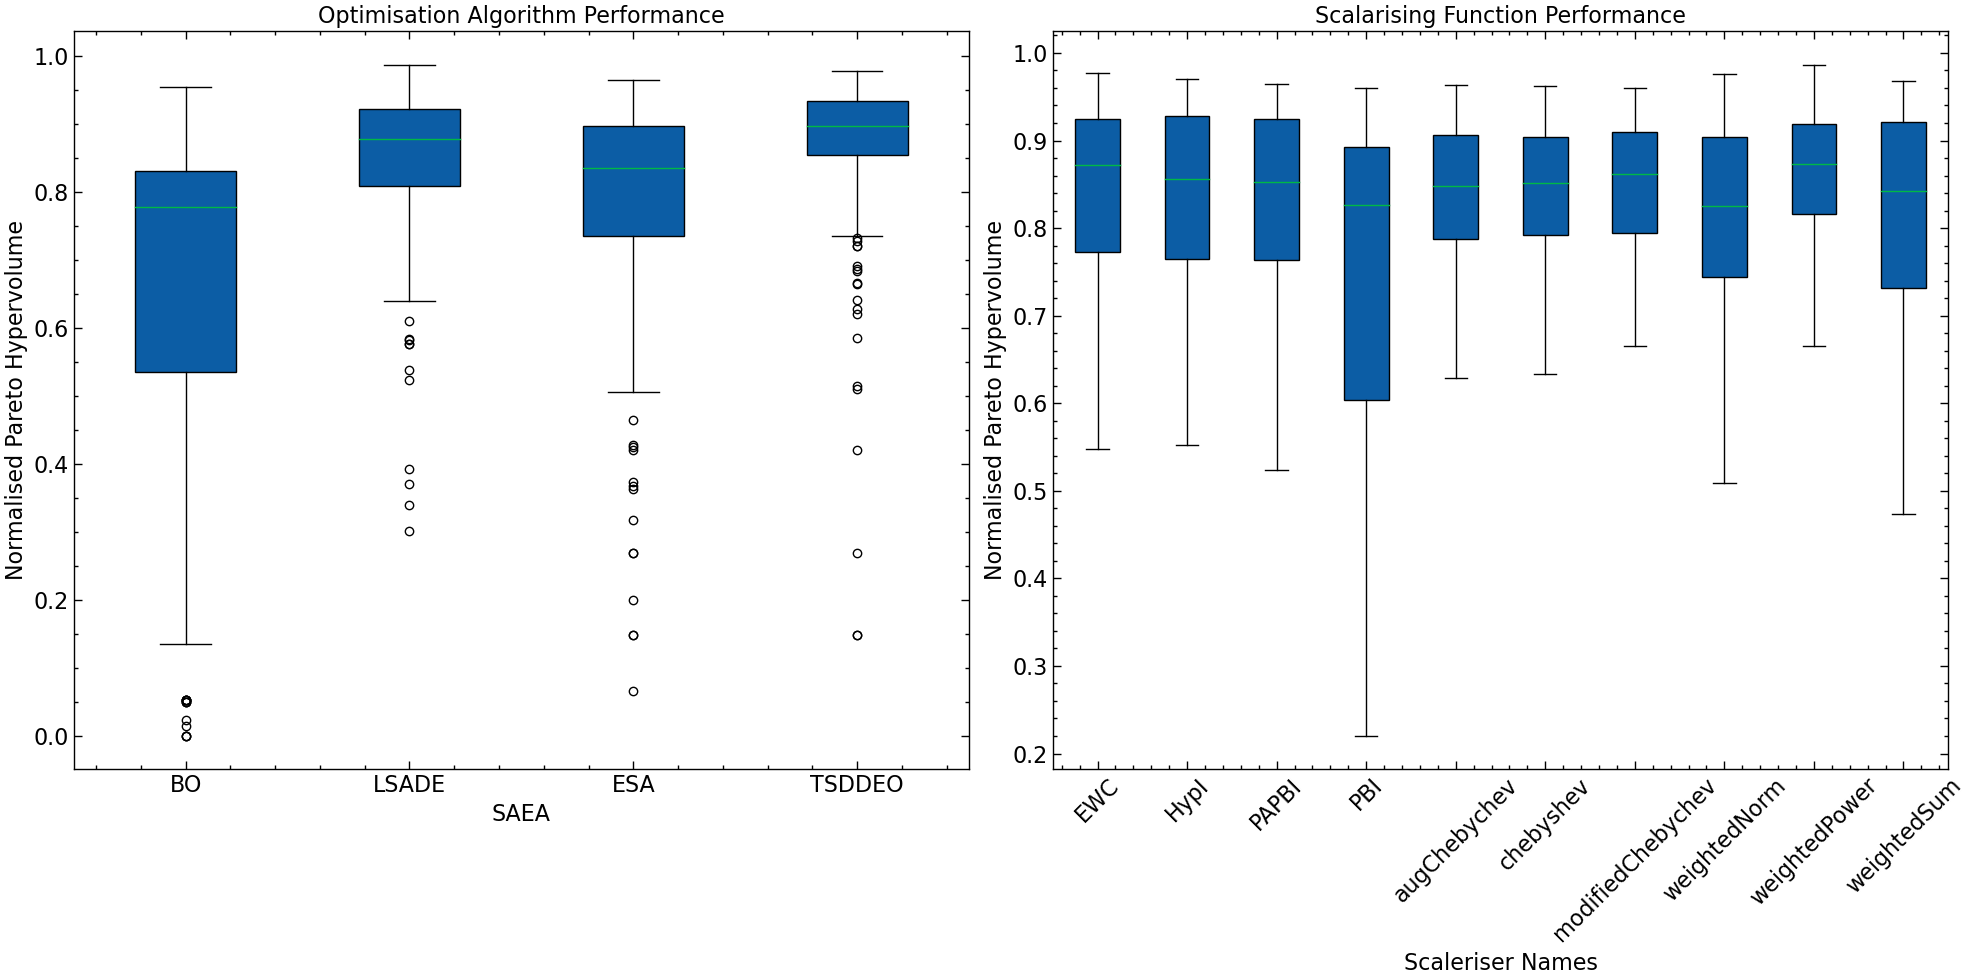

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # Create a figure with 2 subplots side by side

# Plot 1: Boxplot grouped by `keys`
boxData = []
keys = list(finalBoxPlotDict.keys())
for key, value in finalBoxPlotDict.items():
    scalerisers = list(finalBoxPlotDict[key].keys())
    boxDataPerSAEA = []
    for innerKey, innerValue in finalBoxPlotDict[key].items():
        boxDataPerSAEA = np.hstack((boxDataPerSAEA, innerValue))
    boxData.append(boxDataPerSAEA)

axs[0].boxplot(boxData, labels=keys, patch_artist=True)
axs[0].set_title("Optimisation Algorithm Performance")
axs[0].set_xlabel("SAEA")
axs[0].set_ylabel("Normalised Pareto Hypervolume")

# Plot 2: Boxplot grouped by `scaleriserNames`
boxData = []
scaleriserNames = []
for innerKey in finalBoxPlotDict['BO']:
    scaleriserNames.append(innerKey)
    boxDataPerScaleriser = []
    for key, value in finalBoxPlotDict.items():
        boxDataPerScaleriser = np.hstack((boxDataPerScaleriser, finalBoxPlotDict[key][innerKey]))
    boxData.append(boxDataPerScaleriser)

axs[1].boxplot(boxData, labels=scaleriserNames, patch_artist=True, showfliers=False)
axs[1].set_title("Scalarising Function Performance")
axs[1].set_xlabel("Scaleriser Names")
axs[1].set_ylabel("Normalised Pareto Hypervolume")

axs[1].tick_params(axis='x', rotation=45)

# Adjust layout for better readability
fig.tight_layout()

# Display the combined plot
plt.show()


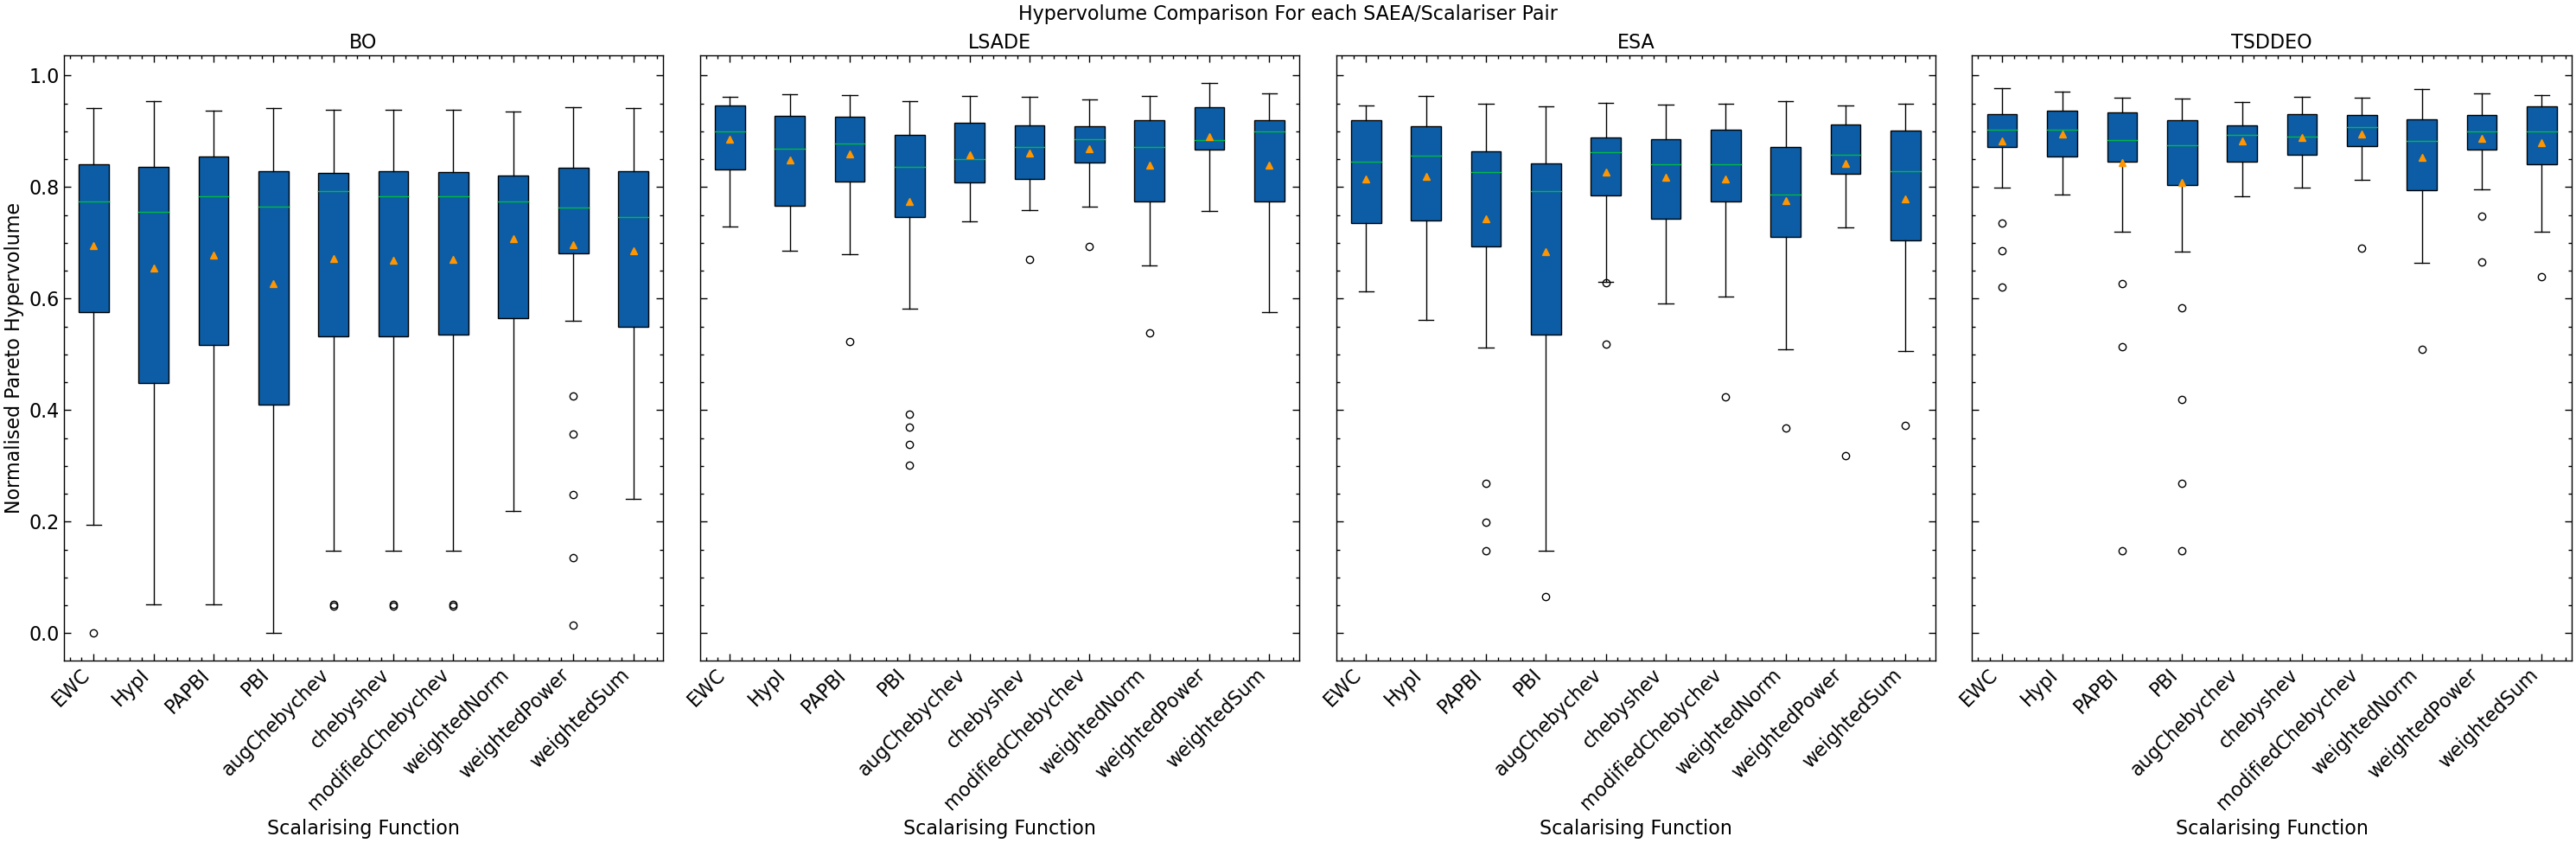

All Median Values Ranked:
Rank 1: Median: 0.9076764226426459, Optimiser: TSDDEO, Scalarising Function: modifiedChebychev
Rank 2: Median: 0.9021947968794028, Optimiser: TSDDEO, Scalarising Function: EWC
Rank 3: Median: 0.9021131072360291, Optimiser: TSDDEO, Scalarising Function: HypI
Rank 4: Median: 0.9002392396497314, Optimiser: LSADE, Scalarising Function: weightedSum
Rank 5: Median: 0.9002070135989533, Optimiser: TSDDEO, Scalarising Function: weightedPower
Rank 6: Median: 0.8999116746796376, Optimiser: LSADE, Scalarising Function: EWC
Rank 7: Median: 0.8992051050277114, Optimiser: TSDDEO, Scalarising Function: weightedSum
Rank 8: Median: 0.8942039532709256, Optimiser: TSDDEO, Scalarising Function: augChebychev
Rank 9: Median: 0.8910135540586849, Optimiser: TSDDEO, Scalarising Function: chebyshev
Rank 10: Median: 0.8859527404895357, Optimiser: LSADE, Scalarising Function: modifiedChebychev
Rank 11: Median: 0.8844351292815353, Optimiser: LSADE, Scalarising Function: weightedPower
Rank 

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(30, 10), sharey=True)

# Dictionary to store medians
medianValuesDict = {}

# Iterate over optimisers and plot
for i, (optimiser, scalarisingFunctions) in enumerate(finalBoxPlotDict.items()):
    scalarisingFunctionKeys = list(scalarisingFunctions.keys())
    dataToPlot = [scalarisingFunctions[key] for key in scalarisingFunctionKeys]

    # Box plot for the optimiser
    box = axes[i].boxplot(dataToPlot, labels=scalarisingFunctionKeys, patch_artist=True, showmeans=True)
    
    # Extract medians from the boxplot dictionary
    medians = box['medians']
    medianValuesDict[optimiser] = {
        scalarisingFunctionKeys[j]: medians[j].get_ydata()[0] for j in range(len(medians))
    }

    # Formatting the plot
    axes[i].set_title(f"{optimiser}")
    axes[i].set_xlabel("Scalarising Function")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].xaxis.set_tick_params(which='both')
    axes[i].set_xticks(range(1, len(scalarisingFunctionKeys) + 1))
    axes[i].set_xticklabels(scalarisingFunctionKeys, rotation=45, ha='right')

axes[0].set_ylabel("Normalised Pareto Hypervolume")
fig.suptitle(f'Hypervolume Comparison For each SAEA/Scalariser Pair', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Create a list to store all medians with their corresponding optimiser and function
median_list = []

# Populate the list with (median_value, optimiser, scalarising_function)
for optimiser, functions in medianValuesDict.items():
    for function, median_value in functions.items():
        median_list.append((median_value, optimiser, function))

# Sort the list by the median values in descending order
sorted_medians = sorted(median_list, key=lambda x: x[0], reverse=True)

# Print all median values with their ranks
print("All Median Values Ranked:")
for rank, (median_value, optimiser, function) in enumerate(sorted_medians, start=1):
    print(f"Rank {rank}: Median: {median_value}, Optimiser: {optimiser}, Scalarising Function: {function}")


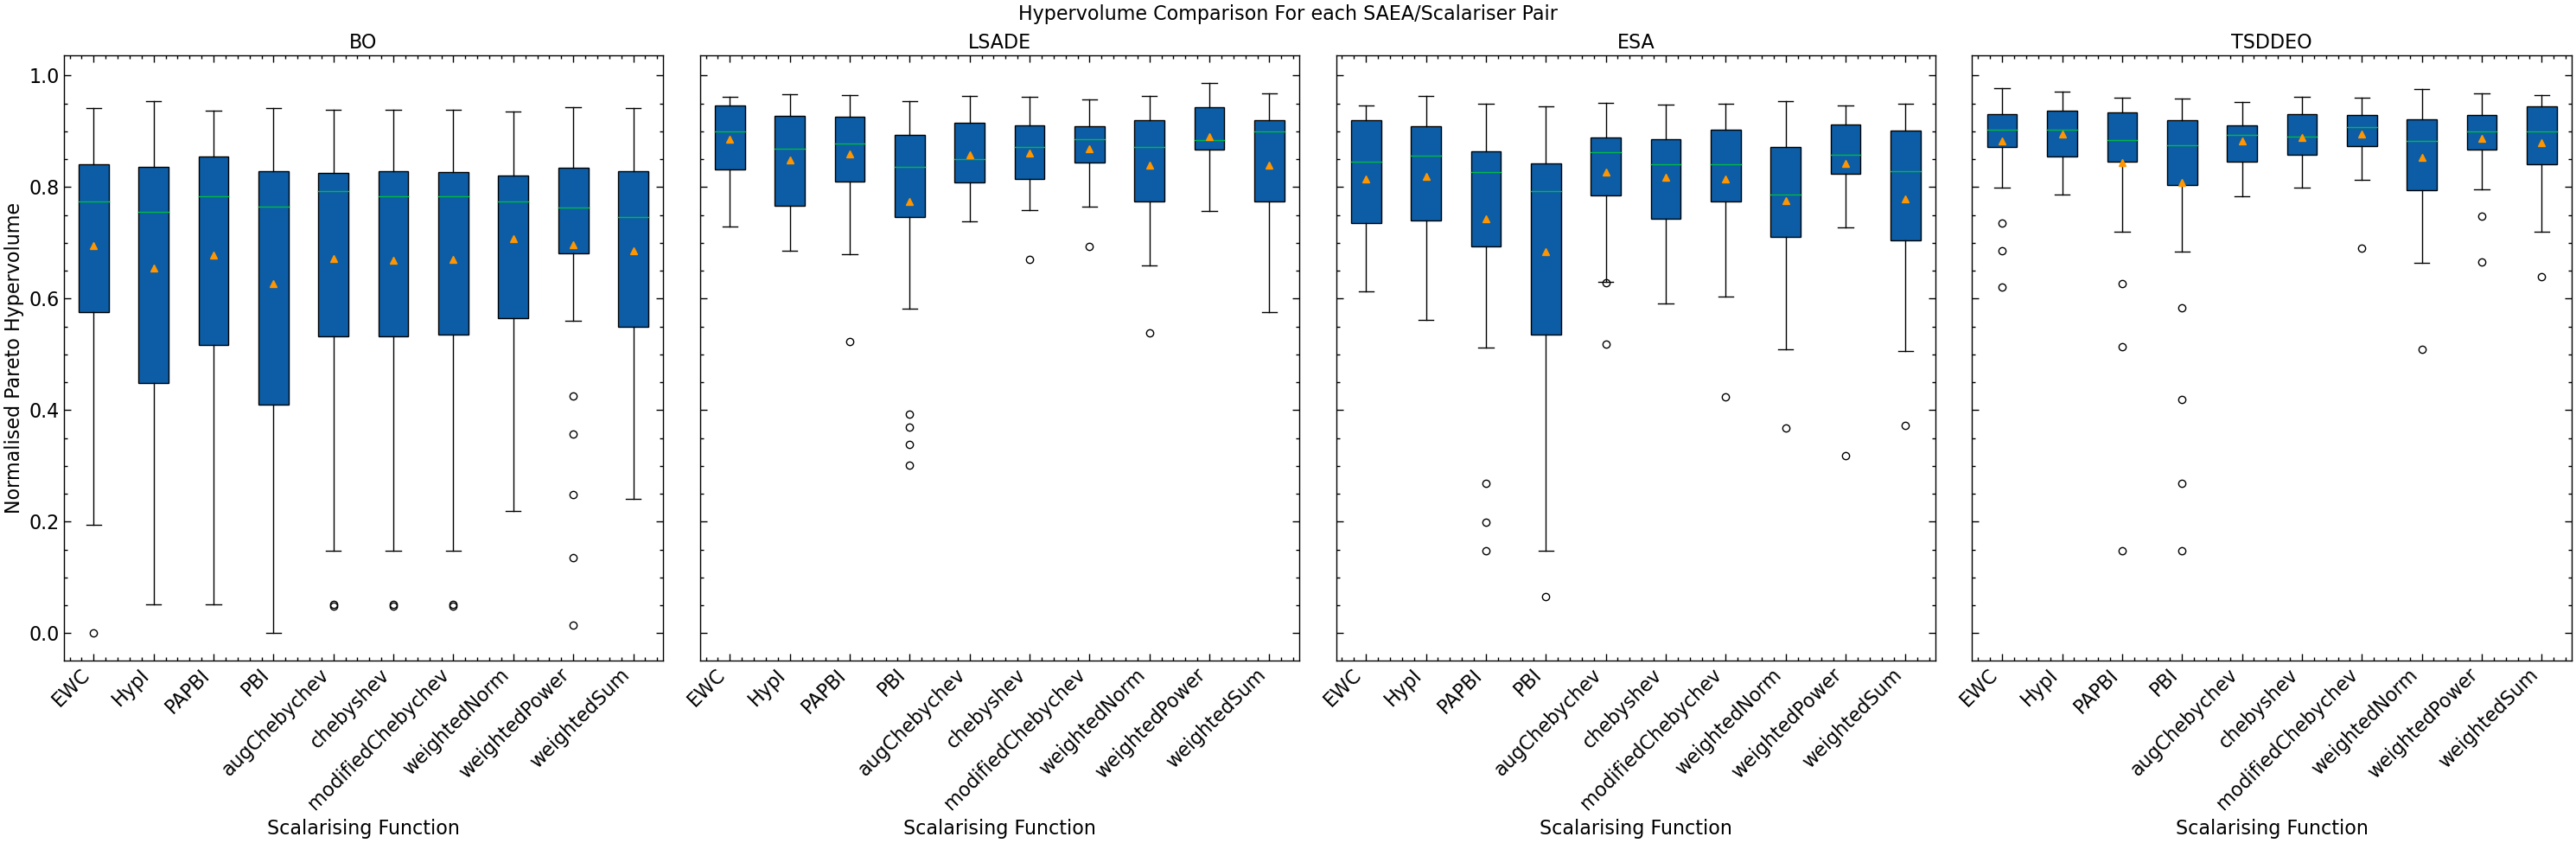


All Mean Values Ranked:
Rank 1: Mean: 0.8951063474888592, Optimiser: TSDDEO, Scalarising Function: HypI
Rank 2: Mean: 0.895044639108893, Optimiser: TSDDEO, Scalarising Function: modifiedChebychev
Rank 3: Mean: 0.8907425274323609, Optimiser: LSADE, Scalarising Function: weightedPower
Rank 4: Mean: 0.8893793661867417, Optimiser: TSDDEO, Scalarising Function: chebyshev
Rank 5: Mean: 0.887422690278356, Optimiser: TSDDEO, Scalarising Function: weightedPower
Rank 6: Mean: 0.8854224794980057, Optimiser: LSADE, Scalarising Function: EWC
Rank 7: Mean: 0.8824242066093445, Optimiser: TSDDEO, Scalarising Function: EWC
Rank 8: Mean: 0.8822790537322851, Optimiser: TSDDEO, Scalarising Function: augChebychev
Rank 9: Mean: 0.8788592895508758, Optimiser: TSDDEO, Scalarising Function: weightedSum
Rank 10: Mean: 0.8693781605053997, Optimiser: LSADE, Scalarising Function: modifiedChebychev
Rank 11: Mean: 0.8610955030842024, Optimiser: LSADE, Scalarising Function: chebyshev
Rank 12: Mean: 0.859967555430284

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(30, 10), sharey=True)

# Dictionaries to store medians and means
medianValuesDict = {}
meanValuesDict = {}

# Iterate over optimisers and plot
for i, (optimiser, scalarisingFunctions) in enumerate(finalBoxPlotDict.items()):
    scalarisingFunctionKeys = list(scalarisingFunctions.keys())
    dataToPlot = [scalarisingFunctions[key] for key in scalarisingFunctionKeys]

    # Box plot for the optimiser
    box = axes[i].boxplot(dataToPlot, labels=scalarisingFunctionKeys, patch_artist=True, showmeans=True)
    
    # Extract medians and means from the boxplot dictionary
    medians = box['medians']
    means = box['means']
    medianValuesDict[optimiser] = {
        scalarisingFunctionKeys[j]: medians[j].get_ydata()[0] for j in range(len(medians))
    }
    meanValuesDict[optimiser] = {
        scalarisingFunctionKeys[j]: means[j].get_ydata()[0] for j in range(len(means))
    }

    # Formatting the plot
    axes[i].set_title(f"{optimiser}")
    axes[i].set_xlabel("Scalarising Function")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].xaxis.set_tick_params(which='both')
    axes[i].set_xticks(range(1, len(scalarisingFunctionKeys) + 1))
    axes[i].set_xticklabels(scalarisingFunctionKeys, rotation=45, ha='right')

axes[0].set_ylabel("Normalised Pareto Hypervolume")
fig.suptitle(f'Hypervolume Comparison For each SAEA/Scalariser Pair', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Create a list to store all medians with their corresponding optimiser and function
median_list = []
mean_list = []

# Populate the lists with (median_value/mean_value, optimiser, scalarising_function)
for optimiser, functions in medianValuesDict.items():
    for function, median_value in functions.items():
        median_list.append((median_value, optimiser, function))
for optimiser, functions in meanValuesDict.items():
    for function, mean_value in functions.items():
        mean_list.append((mean_value, optimiser, function))

# Sort the lists by the values in descending order
sorted_medians = sorted(median_list, key=lambda x: x[0], reverse=True)
sorted_means = sorted(mean_list, key=lambda x: x[0], reverse=True)

# Print all median values with their ranks
# print("All Median Values Ranked:")
# for rank, (median_value, optimiser, function) in enumerate(sorted_medians, start=1):
#     print(f"Rank {rank}: Median: {median_value}, Optimiser: {optimiser}, Scalarising Function: {function}")

# Print all mean values with their ranks
print("\nAll Mean Values Ranked:")
for rank, (mean_value, optimiser, function) in enumerate(sorted_means, start=1):
    print(f"Rank {rank}: Mean: {mean_value}, Optimiser: {optimiser}, Scalarising Function: {function}")
